In [1]:
%config IPCompleter.greedy=True
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages

# 1. Prepare a data quality report for your CSV file

In [3]:
# df = pd.read_csv('covid19-cdc-19200690.csv')
df = pd.read_csv('24032021-covid19-cdc-deathyn-recent-10k.csv')

### Check how many rows and columns your CSV has.

In [4]:
df.shape

(10000, 12)

The CSV has 10000 rows and 12 columns.

### Print the first and the last 5 rows.

In [5]:
# first five rows
df.head(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021/01/22,2021/01/22,NaN,NaN,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,Missing,No,Missing
1,2021/01/26,NaN,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
2,2021/02/03,2021/02/05,NaN,2021/02/03,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Missing,Missing,No,Missing
3,2021/02/05,2021/02/05,2021/02/07,2021/02/05,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,Unknown,No,No
4,2021/01/27,2021/01/27,NaN,NaN,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing


In [6]:
# last five rows
df.tail(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9995,2021/01/20,NaN,NaN,NaN,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Missing,Missing,No,Missing
9996,2021/02/01,2021/02/01,NaN,2021/02/01,Laboratory-confirmed case,Female,50 - 59 Years,Unknown,No,Missing,No,Missing
9997,2021/01/29,2021/02/03,NaN,NaN,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
9998,2021/01/28,2021/01/28,NaN,NaN,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
9999,2021/01/24,2021/02/03,NaN,2021/01/24,Laboratory-confirmed case,Male,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing


## Convert the features to their appropriate data types

In [7]:
df.dtypes

cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtype: object

In [8]:
df.nunique()

cdc_case_earliest_dt       26
cdc_report_dt              47
pos_spec_dt                41
onset_dt                   31
current_status              2
sex                         5
age_group                  10
race_ethnicity_combined     9
hosp_yn                     4
icu_yn                      4
death_yn                    2
medcond_yn                  4
dtype: int64

Based on examining the data in a spreadsheet program, 4 of the features are continuous and the rest categorical.

- 'cdc_case_earliest_dt', 'cdc_report_dt', 'pos_spec_dt' and 'onset_dt' will all be converted to type datetime64[ns], as their values are all dates.
- The rest of the columns will be converted to type 'category' as they all have 10 or fewer unique values.



## Continuous columns

- **First rename the columns to be slightly shorter and easier to understand**

In [9]:
df.rename(columns={'cdc_case_earliest_dt':'earliest_date', 'cdc_report_dt':'report_date',
                   'pos_spec_dt':'posSpec_date', 'onset_dt':'onset'}, inplace=True)

- **select the columns for the continuous table, and assign the list of these column names to the variable 'continuous'**

In [10]:
continuous = df[['earliest_date','report_date','posSpec_date','onset']].columns
continuous

Index(['earliest_date', 'report_date', 'posSpec_date', 'onset'], dtype='object')

- **convert each of these features to datetime object, making sure to specify that the format of the entries is in the order: day, month, year. This will make sure that the values are stored properly.**

In [11]:
for date in df[continuous]:
    df[date] = pd.to_datetime(df[date], format='%Y/%m/%d')

df[continuous]

,earliest_date,report_date,posSpec_date,onset
0,2021-01-22,2021-01-22,NaT,NaT
1,2021-01-26,NaT,NaT,NaT
2,2021-02-03,2021-02-05,NaT,2021-02-03
3,2021-02-05,2021-02-05,2021-02-07,2021-02-05
4,2021-01-27,2021-01-27,NaT,NaT
...,...,...,...,...
9995,2021-01-20,NaT,NaT,NaT
9996,2021-02-01,2021-02-01,NaT,2021-02-01
9997,2021-01-29,2021-02-03,NaT,NaT
9998,2021-01-28,2021-01-28,NaT,NaT


In [12]:
df[continuous].dtypes

earliest_date    datetime64[ns]
report_date      datetime64[ns]
posSpec_date     datetime64[ns]
onset            datetime64[ns]
dtype: object

We can see that the continuous columns are all of type datetime64[ns] now

## Categorical Columns

- **First – as I did with the continuous columns – rename the columns to be slightly shorter and easier to understand**

In [13]:
df.rename(columns={'current_status':'status', 'race_ethnicity_combined':'race_ethnicity','hosp_yn':'hosp',
                  'icu_yn':'icu','death_yn':'death','medcond_yn':'medcond'}, inplace=True)

- **select the columns for the categorical table, and assign the list of these column names to the variable 'categorical'**

In [14]:
categorical = df[['status','sex','age_group','race_ethnicity','hosp','icu','death','medcond']].columns
categorical

Index(['status', 'sex', 'age_group', 'race_ethnicity', 'hosp', 'icu', 'death',
       'medcond'],
      dtype='object')

- **convert each of these features to type 'category'**

In [15]:
for col in categorical:
    df[col] = df[col].astype('category')

In [16]:
df[categorical].dtypes

status            category
sex               category
age_group         category
race_ethnicity    category
hosp              category
icu               category
death             category
medcond           category
dtype: object

We can see that the categorical columns are all of type category now

## Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.

In [17]:
# duplicate rows
print("Number of duplicated (excluding first) rows in the CSV file is:", df.duplicated().sum())
print("Number of duplicated (including first) rows in the CSV file is:", df[df.duplicated(keep=False)].shape[0])

Number of duplicated (excluding first) rows in the CSV file is: 1681
Number of duplicated (including first) rows in the CSV file is: 2749


In [18]:
# duplicate columns
dfT = df.T
print("Number of duplicated (excluding first) columns in the CSV file is:", dfT.duplicated().sum())
print("Number of duplicated (including first) columns in the CSV file is:", dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicated (excluding first) columns in the CSV file is: 0
Number of duplicated (including first) columns in the CSV file is: 0


- **There are 473 rows that are duplicates.**
- **There are no duplicate columns.**
- **There are no constant columns – all columns have at least 2 unique values, which can be seen in the results displayed by running the nunique() function on the dataframe**

I think it makes sense to keep the duplicate rows. There are no details that can uniquely identify a patient, such as an email or patient ID number and it is possible that the duplicate rows are entries of different people with the same details in terms of this dataframe.

### No duplicate columns were found. But I will check that duplicated() function works on a small dataframe that contains dupicate columns.

In [19]:
data = {'col1': [1, 1, 5], 'col2': [1, 1, 4], 'col3': [1, 1, 5], 'col4': [1, 1, 5], 'col2': [1, 1, 4]}
sampleDuplicate = pd.DataFrame(data=data)
sampleDuplicate

,col1,col2,col3,col4
0,1,1,1,1
1,1,1,1,1
2,5,4,5,5


This dataframe should have 2 columns (excluding first) that are duplicates, and 1 row (excluding first) that are duplicates

In [20]:
# rows
print('Number of duplicate rows (excluding first) is:', sampleDuplicate.duplicated().sum())
print("Number of duplicated rows (including first) in the CSV file is:", sampleDuplicate[sampleDuplicate.duplicated(keep=False)].shape[0])

# columns
print('Number of duplicate columns (excluding first) is:', sampleDuplicate.T.duplicated().sum())
print("Number of duplicated columns (including first) in the CSV file is:", sampleDuplicate.T[sampleDuplicate.T.duplicated(keep=False)].shape[0])

Number of duplicate rows (excluding first) is: 1
Number of duplicated rows (including first) in the CSV file is: 2
Number of duplicate columns (excluding first) is: 2
Number of duplicated columns (including first) in the CSV file is: 3


The duplicated() function appears to be working correctly, therefore it can be assumed that there are no duplicate rows.

## Descriptive statistics: Continuous features

In [21]:
df[continuous].describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
earliest_date,10000,2021-01-29 09:49:58.080000000,2021-01-19,2021-01-23,2021-01-29,2021-02-04,2021-02-13
report_date,7835,2021-02-01 11:15:03.790682880,2020-07-17,2021-01-26,2021-02-01,2021-02-08,2021-02-27
posSpec_date,2555,2021-01-29 23:23:55.772994304,2020-07-17,2021-01-24,2021-01-29,2021-02-05,2021-02-23
onset,4162,2021-01-29 13:35:50.312349952,2021-01-19,2021-01-23,2021-01-29,2021-02-04,2021-02-27


We know the data type for each feature and we know the cardinality for each feature.
Now we can find out:
- the range of values each feature has
- the number of instances of the 15 most common values for each feature
- the number of instances of the 15 least common values for each feature

In [22]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in continuous:
    print(feature)
    print("----------\n")
    print("Range of {} is:".format(feature), (df[feature].max() - df[feature].min()))
    print("Latest date is {}:".format(df[feature].max()))
    print("Earliest date is {}:".format(df[feature].min()))
    print("----------")
    print("15 most common values:")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n")
    print("15 least common values:")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nsmallest(15), "\n\n\n")

earliest_date
----------

Range of earliest_date is: 25 days 00:00:00
Latest date is 2021-02-13 00:00:00:
Earliest date is 2021-01-19 00:00:00:
----------
15 most common values:
Value  Number of Instances
2021-01-20    620
2021-01-29    610
2021-01-19    584
2021-01-21    564
2021-01-25    555
2021-01-22    534
2021-01-26    492
2021-01-28    469
2021-01-27    439
2021-02-01    427
2021-02-03    386
2021-01-23    380
2021-02-02    359
2021-01-30    341
2021-01-24    321
Name: earliest_date, dtype: int64 

15 least common values:
Value  Number of Instances
2021-02-13    182
2021-02-07    190
2021-02-06    223
2021-02-12    242
2021-02-09    269
2021-01-31    281
2021-02-11    287
2021-02-10    298
2021-02-05    309
2021-02-04    319
2021-02-08    319
2021-01-24    321
2021-01-30    341
2021-02-02    359
2021-01-23    380
Name: earliest_date, dtype: int64 



report_date
----------

Range of report_date is: 225 days 00:00:00
Latest date is 2021-02-27 00:00:00:
Earliest date is 2020-07-17

### Do any continuous features aside from 'earliest_date' appear on their own?

In [23]:
# how many have just report_date?

reportCount = []
for i in range(len(df)):
    if not pd.isnull(df.loc[i]['report_date']):
        if pd.isnull(df.loc[i]['posSpec_date']) and pd.isnull(df.loc[i]['onset']):
            reportCount.append(i)
            
print(f'There are {len(reportCount)} rows whose continuous features only contain values for \
"report_count" as well as "earliest_date".')

There are 2222 rows whose continuous features only contain values for "report_count" as well as "earliest_date".


In [24]:
df.loc[reportCount].head()

,earliest_date,report_date,posSpec_date,onset,status,sex,age_group,race_ethnicity,hosp,icu,death,medcond
0,2021-01-22,2021-01-22,NaT,NaT,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,Missing,No,Missing
4,2021-01-27,2021-01-27,NaT,NaT,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing
11,2021-01-22,2021-01-22,NaT,NaT,Probable Case,Female,30 - 39 Years,"White, Non-Hispanic",No,Unknown,No,Missing
14,2021-02-04,2021-02-04,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,Missing
17,2021-01-21,2021-01-21,NaT,NaT,Probable Case,Male,10 - 19 Years,"White, Non-Hispanic",No,Missing,No,Missing


In [25]:
#how many just have onset?

onsetCount = []
for i in range(len(df)):
    if not pd.isnull(df.loc[i]['onset']):
        if pd.isnull(df.loc[i]['posSpec_date']) and pd.isnull(df.loc[i]['report_date']):
            onset.append(i)
            
print(f'There are {len(onsetCount)} rows whose continuous features only contain values for \
"report_count" as well as "earliest_date".')

There are 0 rows whose continuous features only contain values for "report_count" as well as "earliest_date".


### Running Assessment:

- Examining the gaps / relationships between the minimum and maximum values and the quartile ranges, the features listed below may contain significant outliers. This is not a definitive list. More insight will be gained from visual analysis of these data presented on histograms below.
<br>

 -  earliest_date
 -  report_date
 -  posSpec_date
 -  onset
<br><br>

-  It is clear from both visual analysis of the rows and from this initial descriptive analysis that there are no continuous outlier values. For each of the continuous features, the most common of the values all occur after the 75th percentile, and the least common values all occur before or up to the 25th percentile. This is consistent with the fact that the earlier dates are earlier in the pandemic, and there would be fewer COVID-19 cases during the earlier period, as the disease had not had time to spread yet. There does not appear to be any special value that skews the data.
<br><br>
- Evidence of the above observation can be seen in the test on the earliest_date column below:
  - the largest range of dates occurs between minimum value and the 25th percentile.
    - a larger range of dates between means a lower rate of COVID-19 cases over this period.
  - the smallest range of dates occurs between the 75th percentile and the maximum value.
    - a smaller range of dates means a higher rate of COVID-19 cases over this period.

### earliest_date

In [26]:
early_min = pd._libs.tslibs.timestamps.Timestamp('2020-01-05')
early_twentyFive = pd._libs.tslibs.timestamps.Timestamp('2020-07-26')
early_fifty = pd._libs.tslibs.timestamps.Timestamp('2020-11-06')
early_seventyFive = pd._libs.tslibs.timestamps.Timestamp('2020-12-15')
early_max = pd._libs.tslibs.timestamps.Timestamp('2021-01-16')

print(f'There are {early_twentyFive - early_min} between the earliest date and the that of the 25th percentile.')
print(f'There are {early_fifty - early_twentyFive} between the 25th percentile and the that of the 50th percentile.')
print(f'There are {early_seventyFive - early_fifty} between the 50th percentile and the that of the 75th percentile.')
print(f'There are {early_max - early_seventyFive} between the 75th percentile and the that of the latest date.')

There are 203 days 00:00:00 between the earliest date and the that of the 25th percentile.
There are 103 days 00:00:00 between the 25th percentile and the that of the 50th percentile.
There are 39 days 00:00:00 between the 50th percentile and the that of the 75th percentile.
There are 32 days 00:00:00 between the 75th percentile and the that of the latest date.


### report_date

In [27]:
report_min = pd._libs.tslibs.timestamps.Timestamp('2020-01-05')
report_twentyFive = pd._libs.tslibs.timestamps.Timestamp('2020-08-15')
report_fifty = pd._libs.tslibs.timestamps.Timestamp('2020-11-11')
report_seventyFive = pd._libs.tslibs.timestamps.Timestamp('2020-12-21')
report_max = pd._libs.tslibs.timestamps.Timestamp('2021-01-29')

print(f'There are {report_twentyFive - report_min} between the earliest date and the that of the 25th percentile.')
print(f'There are {report_fifty - report_twentyFive} between the 25th percentile and the that of the 50th percentile.')
print(f'There are {report_seventyFive - report_fifty} between the 50th percentile and the that of the 75th percentile.')
print(f'There are {report_max - report_seventyFive} between the 75th percentile and the that of the latest date.')

There are 223 days 00:00:00 between the earliest date and the that of the 25th percentile.
There are 88 days 00:00:00 between the 25th percentile and the that of the 50th percentile.
There are 40 days 00:00:00 between the 50th percentile and the that of the 75th percentile.
There are 39 days 00:00:00 between the 75th percentile and the that of the latest date.


### posSpec_date

In [28]:
pos_min = pd._libs.tslibs.timestamps.Timestamp('2020-03-06')
pos_twentyFive = pd._libs.tslibs.timestamps.Timestamp('2020-07-02')
pos_fifty = pd._libs.tslibs.timestamps.Timestamp('2020-10-11')
pos_seventyFive = pd._libs.tslibs.timestamps.Timestamp('2020-12-02')
pos_max = pd._libs.tslibs.timestamps.Timestamp('2021-01-25')

print(f'There are {pos_twentyFive - pos_min} between the earliest date and the that of the 25th percentile.')
print(f'There are {pos_fifty - pos_twentyFive} between the 25th percentile and the that of the 50th percentile.')
print(f'There are {pos_seventyFive - pos_fifty} between the 50th percentile and the that of the 75th percentile.')
print(f'There are {pos_max - pos_seventyFive} between the 75th percentile and the that of the latest date.')

There are 118 days 00:00:00 between the earliest date and the that of the 25th percentile.
There are 101 days 00:00:00 between the 25th percentile and the that of the 50th percentile.
There are 52 days 00:00:00 between the 50th percentile and the that of the 75th percentile.
There are 54 days 00:00:00 between the 75th percentile and the that of the latest date.


### Onset

In [29]:
onset_min = pd._libs.tslibs.timestamps.Timestamp('2020-01-05')
onset_twentyFive = pd._libs.tslibs.timestamps.Timestamp('2020-07-14')
onset_fifty = pd._libs.tslibs.timestamps.Timestamp('2020-10-18')
onset_seventyFive = pd._libs.tslibs.timestamps.Timestamp('2020-12-02')
onset_max = pd._libs.tslibs.timestamps.Timestamp('2021-01-27')

print(f'There are {onset_twentyFive - onset_min} between the earliest date and the that of the 25th percentile.')
print(f'There are {onset_fifty - onset_twentyFive} between the 25th percentile and the that of the 50th percentile.')
print(f'There are {onset_seventyFive - onset_fifty} between the 50th percentile and the that of the 75th percentile.')
print(f'There are {onset_max - onset_seventyFive} between the 75th percentile and the that of the latest date.')

There are 191 days 00:00:00 between the earliest date and the that of the 25th percentile.
There are 96 days 00:00:00 between the 25th percentile and the that of the 50th percentile.
There are 45 days 00:00:00 between the 50th percentile and the that of the 75th percentile.
There are 56 days 00:00:00 between the 75th percentile and the that of the latest date.


## Check logical integrity of data
The following are some checks to see that the data makes sense. Rows that fail these tests may be dropped from the dataframe, or have values replaced

### Test 1:
- are there any rows where the 'earliest_date' column is a later date than any of the other columns?
  - this should be impossible as the 'earliest_date' column should be earlier than or equal to all other date columns.

In [30]:
failed_rows_earliest_date = []

for i in range(df.shape[0]):
    if df.loc[i]['report_date'] < df.loc[i]['earliest_date'] or df.loc[i]['posSpec_date'] < df.loc[i]['earliest_date']\
    or df.loc[i]['onset'] < df.loc[i]['earliest_date']:
        failed_rows_earliest_date.append(i)
print(f'There are {len(failed_rows_earliest_date)} rows that have a date earlier than the "earliest_column" date.')
print()
print('Rows that have a date earlier than the "earliest_date" column:', failed_rows_earliest_date)

There are 38 rows that have a date earlier than the "earliest_column" date.

Rows that have a date earlier than the "earliest_date" column: [136, 137, 275, 1363, 2387, 2521, 2856, 2920, 3289, 3419, 4936, 5068, 5130, 5859, 5900, 5961, 6027, 6334, 6499, 6622, 6899, 6923, 7036, 7064, 7103, 7205, 7265, 7288, 7357, 7370, 7575, 7705, 7714, 7878, 7895, 8483, 8983, 9422]


In [31]:
df.loc[failed_rows_earliest_date].head()

,earliest_date,report_date,posSpec_date,onset,status,sex,age_group,race_ethnicity,hosp,icu,death,medcond
136,2021-02-09,2021-02-08,2021-02-08,2021-02-09,Laboratory-confirmed case,Male,10 - 19 Years,"White, Non-Hispanic",No,Missing,No,No
137,2021-01-30,2021-01-06,2021-02-03,2021-01-30,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",No,No,No,No
275,2021-01-23,2021-01-26,2021-01-22,2021-01-23,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,Missing,Missing,No,No
1363,2021-01-19,2021-01-22,2021-01-18,2021-01-19,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",Missing,Missing,No,Yes
2387,2021-01-23,2020-12-16,NaT,2021-01-23,Probable Case,Male,50 - 59 Years,"White, Non-Hispanic",Missing,Missing,Yes,Missing


### Test 2:
- are there any rows that have a 'probable_case' for the status column, and a not null value for the posSpec_date column?
  - this should be impossible, because if the case is not marked as 'Laboratory-confirmed case', there should be no date for when a positive specimen sample was collected.

In [32]:
failed_rows_PosSpec_date_status = []

for i in range(df.shape[0]):
    if not pd.isnull(df.loc[i]['posSpec_date']) and df.loc[i]['status'] == 'Probable Case':
        failed_rows_PosSpec_date_status.append(i)
        
print(f'There are {len(failed_rows_PosSpec_date_status)} rows that have a "probable_case" for the status column, \
and a not null value for the posSpec_date column.')
print()
print(f'Rows that have a "probable_case" for the status column,\
and a not null value for the posSpec_date column: {failed_rows_PosSpec_date_status}.')

There are 344 rows that have a "probable_case" for the status column, and a not null value for the posSpec_date column.

Rows that have a "probable_case" for the status column,and a not null value for the posSpec_date column: [23, 41, 44, 83, 91, 134, 217, 224, 258, 304, 315, 337, 340, 342, 471, 484, 501, 546, 560, 561, 636, 640, 669, 675, 681, 784, 802, 806, 850, 952, 956, 986, 1005, 1021, 1031, 1072, 1102, 1108, 1141, 1144, 1149, 1182, 1198, 1214, 1252, 1261, 1389, 1408, 1430, 1434, 1436, 1476, 1492, 1557, 1562, 1583, 1592, 1617, 1640, 1689, 1731, 1737, 1750, 1755, 1763, 1777, 1782, 1859, 1862, 1890, 1894, 1914, 1920, 1922, 1952, 2045, 2066, 2103, 2109, 2112, 2129, 2169, 2176, 2184, 2195, 2201, 2220, 2221, 2240, 2281, 2301, 2304, 2309, 2336, 2348, 2371, 2390, 2401, 2421, 2425, 2529, 2531, 2540, 2545, 2555, 2574, 2575, 2609, 2631, 2636, 2684, 2723, 2734, 2745, 2800, 2801, 2892, 2906, 2909, 2962, 2979, 2996, 3037, 3054, 3063, 3070, 3099, 3114, 3118, 3143, 3158, 3164, 3184, 3282, 3304, 

In [33]:
df.loc[failed_rows_PosSpec_date_status].head()

,earliest_date,report_date,posSpec_date,onset,status,sex,age_group,race_ethnicity,hosp,icu,death,medcond
23,2021-01-28,2021-01-28,2021-01-28,NaT,Probable Case,Female,20 - 29 Years,Unknown,Unknown,Unknown,No,Unknown
41,2021-02-02,2021-02-02,2021-02-02,NaT,Probable Case,Male,60 - 69 Years,"White, Non-Hispanic",Unknown,Unknown,No,Unknown
44,2021-01-30,2021-01-30,2021-01-30,NaT,Probable Case,Male,70 - 79 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
83,2021-02-05,2021-02-05,2021-02-05,NaT,Probable Case,Male,30 - 39 Years,Unknown,No,Missing,No,Missing
91,2021-02-03,2021-02-03,2021-02-03,NaT,Probable Case,Male,30 - 39 Years,Unknown,Unknown,Unknown,No,Unknown


### Test 3:
- are there any rows that have a 'yes' value for the icu column, and 'no', 'unknown', or 'missing' for the hosp column?
  - this should be impossible if the hosp value is 'no'.
  - it should also indicate the value for the hosp column if the hosp value is 'unknown' or 'missing'.

In [34]:
failed_rows_hosp_icu = []

for i in range(df.shape[0]):
    if df.loc[i]['icu'] == 'Yes' and (df.loc[i]['hosp'] == 'No' or df.loc[i]['hosp'] == 'Unknown'\
                                      or df.loc[i]['hosp'] == 'Missing'):
        failed_rows_hosp_icu.append(i)

print(f'There are {len(failed_rows_hosp_icu)} rows that have a "yes" value for the icu column \
and "no", "missing", or "unknown" for the hosp column.')

There are 0 rows that have a "yes" value for the icu column and "no", "missing", or "unknown" for the hosp column.


## Save your updated/cleaned data frame to a new csv file.

In [35]:
# df.to_csv('covid19-cdc-19200690_cleaned_1_1.csv')

## Prepare a table with descriptive statistics for all the continuous features.

In [36]:
df[continuous].describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
earliest_date,10000,2021-01-29 09:49:58.080000000,2021-01-19,2021-01-23,2021-01-29,2021-02-04,2021-02-13
report_date,7835,2021-02-01 11:15:03.790682880,2020-07-17,2021-01-26,2021-02-01,2021-02-08,2021-02-27
posSpec_date,2555,2021-01-29 23:23:55.772994304,2020-07-17,2021-01-24,2021-01-29,2021-02-05,2021-02-23
onset,4162,2021-01-29 13:35:50.312349952,2021-01-19,2021-01-23,2021-01-29,2021-02-04,2021-02-27


- **Add column for % missing**

In [37]:
continuous_columns_missing  = 100 * (df[continuous].isnull().sum()/df.shape[0])
df_continuous_missing = pd.DataFrame(continuous_columns_missing, columns=['% missing'])
df_continuous_missing

,% missing
earliest_date,0.00
report_date,21.65
posSpec_date,74.45
onset,58.38


- **Add column for cardinality**

In [38]:
continuous_card = df[continuous].nunique()
df_continuous_card = pd.DataFrame(continuous_card, columns=['cardinality'])
df_continuous_card

,cardinality
earliest_date,26
report_date,47
posSpec_date,41
onset,31


- **Create the final continuous data table**

In [39]:
df_table_continuous = df[continuous].describe(datetime_is_numeric=True).T

# Put the columns together to prepare the final table for numeric_columns
df_continuous_columns_data_quality_report_table = pd.concat([df_table_continuous, df_continuous_missing, df_continuous_card], axis=1)

# save to a csv file
# df_continuous_columns_data_quality_report_table.to_csv('df_continuous_columns_data_quality_report_table.csv')

df_continuous_columns_data_quality_report_table

,count,mean,min,25%,50%,75%,max,% missing,cardinality
earliest_date,10000,2021-01-29 09:49:58.080000000,2021-01-19,2021-01-23,2021-01-29,2021-02-04,2021-02-13,0.00,26
report_date,7835,2021-02-01 11:15:03.790682880,2020-07-17,2021-01-26,2021-02-01,2021-02-08,2021-02-27,21.65,47
posSpec_date,2555,2021-01-29 23:23:55.772994304,2020-07-17,2021-01-24,2021-01-29,2021-02-05,2021-02-23,74.45,41
onset,4162,2021-01-29 13:35:50.312349952,2021-01-19,2021-01-23,2021-01-29,2021-02-04,2021-02-27,58.38,31


## Prepare a table with descriptive statistics for all the categorical features.

In [40]:
df_categorical = df[categorical].describe().T

- **Look at the values taken by each categorical feature as a propportion, including the NaN values.**

In [41]:
for column in df[categorical]:
    print("\n" + column)
    print(df[column].value_counts(dropna=False, normalize=True))


status
Laboratory-confirmed case    0.8906
Probable Case                0.1094
Name: status, dtype: float64

sex
Female     0.5127
Male       0.4788
Unknown    0.0073
Missing    0.0011
Other      0.0001
Name: sex, dtype: float64

age_group
20 - 29 Years    0.1730
30 - 39 Years    0.1635
50 - 59 Years    0.1397
40 - 49 Years    0.1396
10 - 19 Years    0.1290
60 - 69 Years    0.1026
0 - 9 Years      0.0592
70 - 79 Years    0.0550
80+ Years        0.0371
Missing          0.0013
Name: age_group, dtype: float64

race_ethnicity
Unknown                                                 0.4128
White, Non-Hispanic                                     0.3397
Black, Non-Hispanic                                     0.0731
Multiple/Other, Non-Hispanic                            0.0655
Hispanic/Latino                                         0.0593
Asian, Non-Hispanic                                     0.0328
American Indian/Alaska Native, Non-Hispanic             0.0069
Missing                       

- **store the 2ndmode and 2ndmode % values in a new dataframe**

In [42]:
df_categorical_mode = pd.DataFrame(index = df_categorical.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_categorical_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
status,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN
age_group,NaN,NaN,NaN,NaN,NaN,NaN
race_ethnicity,NaN,NaN,NaN,NaN,NaN,NaN
hosp,NaN,NaN,NaN,NaN,NaN,NaN
icu,NaN,NaN,NaN,NaN,NaN,NaN
death,NaN,NaN,NaN,NaN,NaN,NaN
medcond,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Look at the values taken by each categorical feature
for column in categorical:
    print("\n" + column)
    print(df[column].value_counts())
    print(df[column].value_counts().keys())
    
    df_categorical_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_categorical_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_categorical_mode.loc[column]['mode']]
    df_categorical_mode.loc[column]['%mode'] = 100 * (df[column].value_counts(normalize=True)[df_categorical_mode.loc[column]['mode']])
    
    if df[column].value_counts().size > 1:
        df_categorical_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_categorical_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_categorical_mode.loc[column]['2ndmode']]
        df_categorical_mode.loc[column]['%2ndmode'] = 100 * (df[column].value_counts(normalize=True)[df_categorical_mode.loc[column]['2ndmode']])
    else: df_categorical_mode.loc[column] = '-'


status
Laboratory-confirmed case    8906
Probable Case                1094
Name: status, dtype: int64
CategoricalIndex(['Laboratory-confirmed case', 'Probable Case'], categories=['Laboratory-confirmed case', 'Probable Case'], ordered=False, dtype='category')

sex
Female     5127
Male       4788
Unknown      73
Missing      11
Other         1
Name: sex, dtype: int64
CategoricalIndex(['Female', 'Male', 'Unknown', 'Missing', 'Other'], categories=['Female', 'Male', 'Missing', 'Other', 'Unknown'], ordered=False, dtype='category')

age_group
20 - 29 Years    1730
30 - 39 Years    1635
50 - 59 Years    1397
40 - 49 Years    1396
10 - 19 Years    1290
60 - 69 Years    1026
0 - 9 Years       592
70 - 79 Years     550
80+ Years         371
Missing            13
Name: age_group, dtype: int64
CategoricalIndex(['20 - 29 Years', '30 - 39 Years', '50 - 59 Years',
                  '40 - 49 Years', '10 - 19 Years', '60 - 69 Years',
                  '0 - 9 Years', '70 - 79 Years', '80+ Years', 'Missi

In [44]:
df_categorical_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
status,Laboratory-confirmed case,8906,89.06,Probable Case,1094,10.94
sex,Female,5127,51.27,Male,4788,47.88
age_group,20 - 29 Years,1730,17.30,30 - 39 Years,1635,16.35
race_ethnicity,Unknown,4128,41.28,"White, Non-Hispanic",3397,33.97
hosp,No,4659,46.59,Missing,2760,27.60
icu,Missing,8067,80.67,Unknown,1391,13.91
death,No,9879,98.79,Yes,121,1.21
medcond,Missing,7942,79.42,Unknown,1025,10.25


- add a column for % missing

In [45]:
categorical_columns_null  = 100 * (df[categorical].isnull().sum()/df.shape[0])

df_categorical_columns_null = pd.DataFrame(categorical_columns_null, columns=['% null'])

df_categorical_columns_null

,% null
status,0.0
sex,0.0
age_group,0.0
race_ethnicity,0.0
hosp,0.0
icu,0.0
death,0.0
medcond,0.0


As we can see, there are no null values in the categorical features. But from reading the values present in each of the categorical columns, there are entries of 'Missing' and 'Unknown'. These values will not contribute to the understanding of the problem. If there are high percentages of these values in a column, it may be suitable to drop the column. I will find out:
- what percentage of 'Missing' or 'Unknown' values are in each column
- in which rows, there are values of 'Missing' or 'Unknown'. Some rows may need to be dropped due to a large amount of missing or unknown values.

In [46]:
df_categorical_columns_missing = pd.DataFrame(columns=['% Missing/Unknown'])

for i in range (len(categorical)):
    df_categorical_columns_missing.loc[df[categorical].columns[i]] =\
    (100 * (df[df[categorical].columns[i]].str.contains('Unknown').sum()/df.shape[0]))\
    + (100 * (df[df[categorical].columns[i]].str.contains('Missing').sum()/df.shape[0]))
    
df_categorical_columns_missing

,% Missing/Unknown
status,0.00
sex,0.84
age_group,0.13
race_ethnicity,41.95
hosp,49.47
icu,94.58
death,0.00
medcond,89.67


- **Create the final categorical data table**

In [47]:
df_table_categorical = df[categorical].describe().T

# Put the columns together to prepare the final table for numeric_columns
df_categorical_columns_data_quality_report_table = pd.concat([df_table_categorical, df_categorical_mode, df_categorical_columns_missing], axis=1)

# save to a csv file
# df_categorical_columns_data_quality_report_table.to_csv('df_categorical_columns_data_quality_report_table.csv')

df_categorical_columns_data_quality_report_table

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,% Missing/Unknown
status,10000,2,Laboratory-confirmed case,8906,Laboratory-confirmed case,8906,89.06,Probable Case,1094,10.94,0.00
sex,10000,5,Female,5127,Female,5127,51.27,Male,4788,47.88,0.84
age_group,10000,10,20 - 29 Years,1730,20 - 29 Years,1730,17.30,30 - 39 Years,1635,16.35,0.13
race_ethnicity,10000,9,Unknown,4128,Unknown,4128,41.28,"White, Non-Hispanic",3397,33.97,41.95
hosp,10000,4,No,4659,No,4659,46.59,Missing,2760,27.60,49.47
icu,10000,4,Missing,8067,Missing,8067,80.67,Unknown,1391,13.91,94.58
death,10000,2,No,9879,No,9879,98.79,Yes,121,1.21,0.00
medcond,10000,4,Missing,7942,Missing,7942,79.42,Unknown,1025,10.25,89.67


## Plot histograms for all the continuous features.

### - Plot histograms summary sheet for all the continuous features.

array([[<AxesSubplot:title={'center':'earliest_date'}>,
        <AxesSubplot:title={'center':'report_date'}>],
       [<AxesSubplot:title={'center':'posSpec_date'}>,
        <AxesSubplot:title={'center':'onset'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

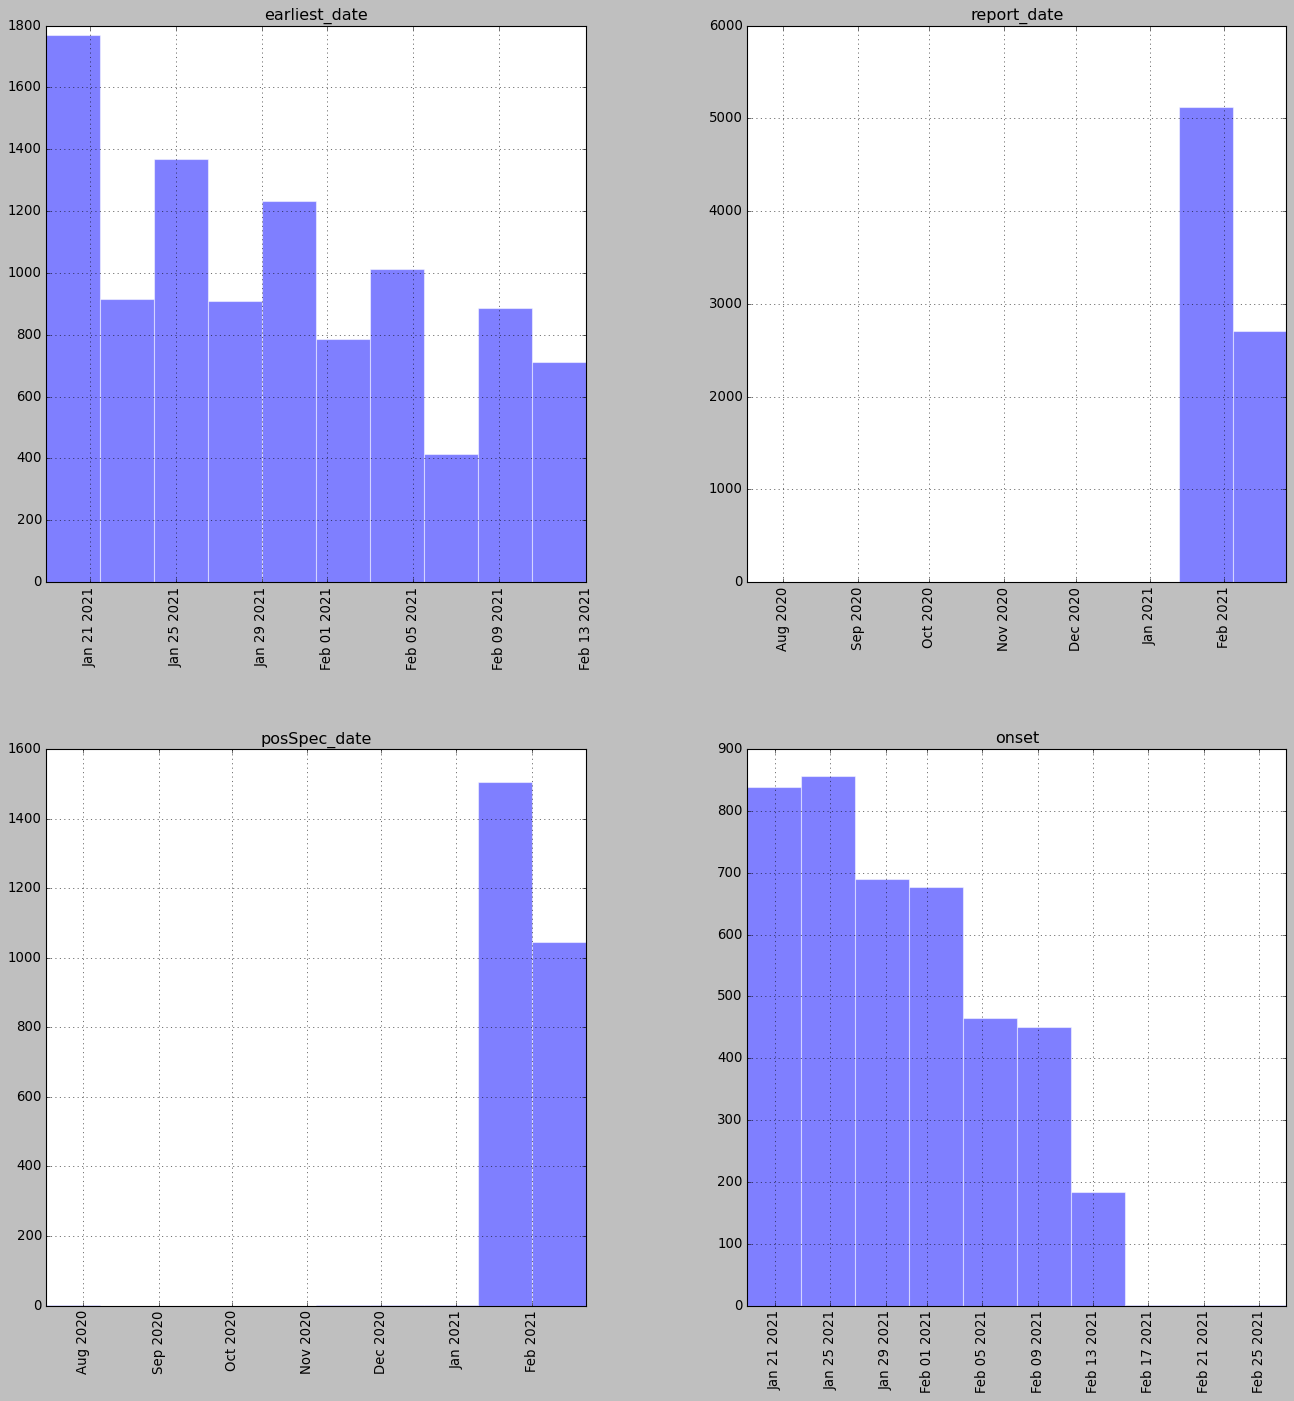

In [48]:
plt.figure()
plt.style.use('classic')
df.hist(figsize=(20, 20), xrot = 90, edgecolor='white', alpha=0.5)

# plt.savefig('covid19-cdc-19200690-DataQualityReport-ContinuousFeatures-histograms-1-1.pdf')

# print(plt.style.available)

### - Plot histograms individual sheet for all the continuous features.

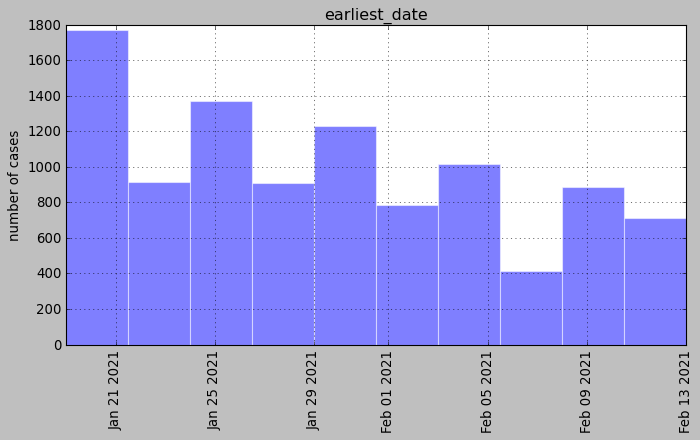

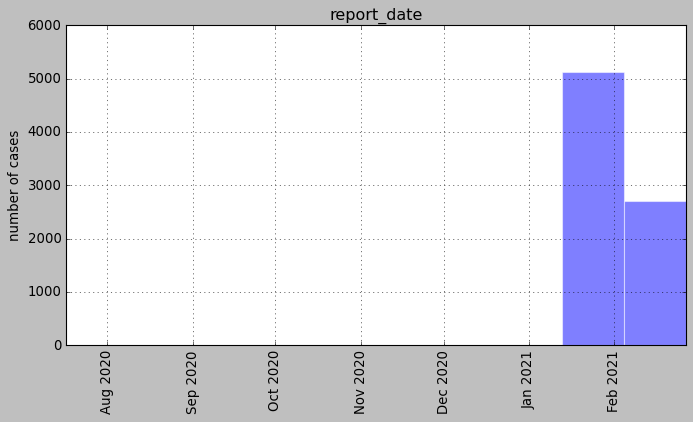

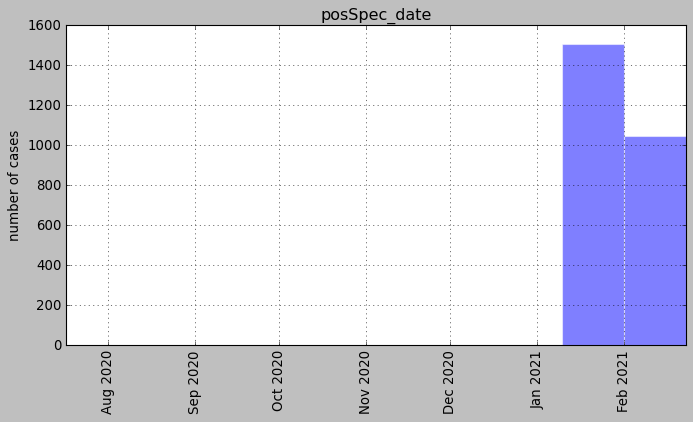

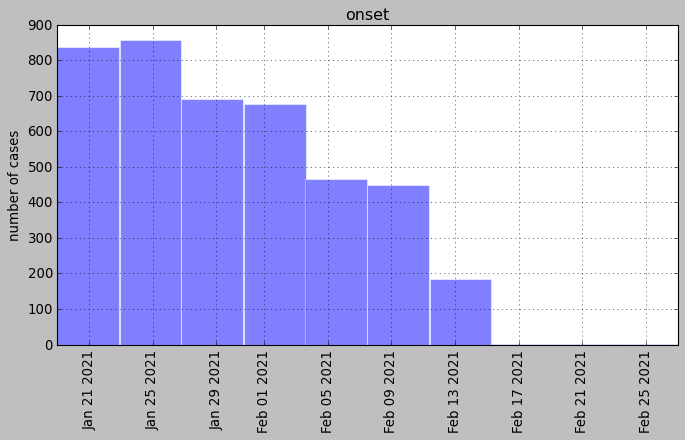

In [49]:
for col in continuous:
    plt.figure()
    plt.style.use('classic')
    plt.title(col)
    plt.ylabel('number of cases')
    df[col].hist(figsize=(10, 5), xrot = 90, edgecolor='white', alpha=0.5)

## Plot box plots for all the continuous features.

It was decided to not use box plots, as there are no outliers for dates. The data is measured from one date to another, and there are no data outside these dates.

## Plot bar plots for all the categorical features.

### - Plot bar chart summary sheet for all the continuous features.

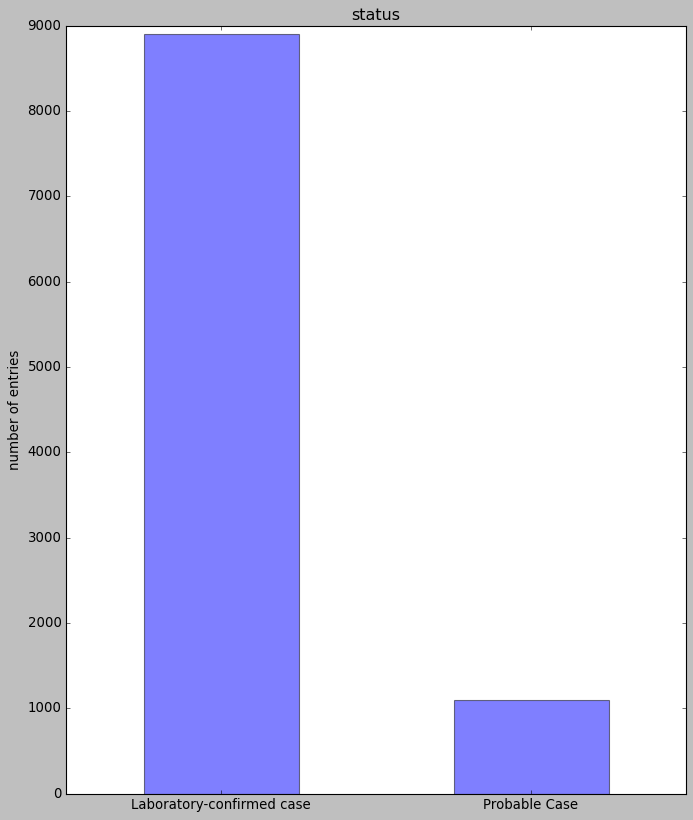

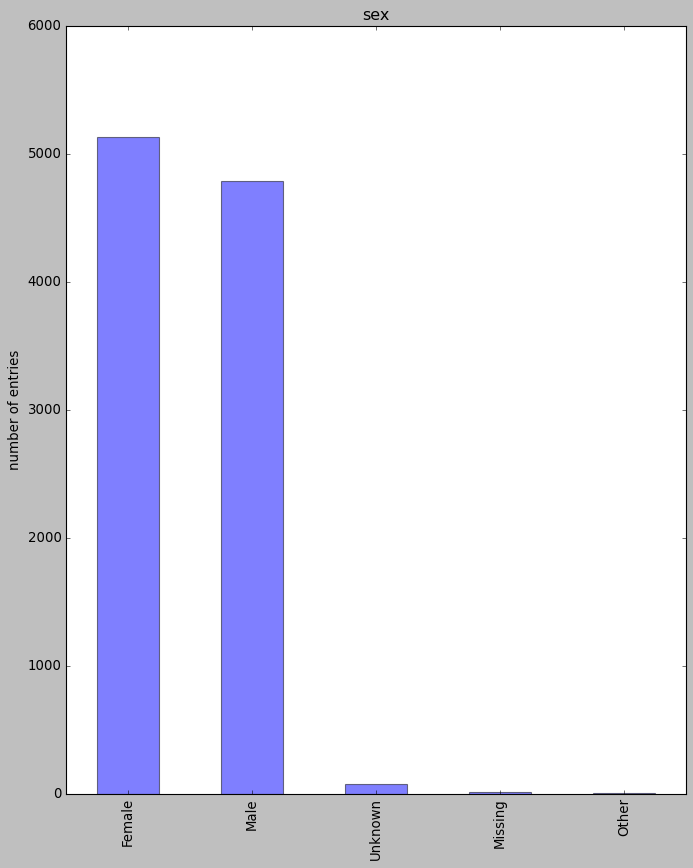

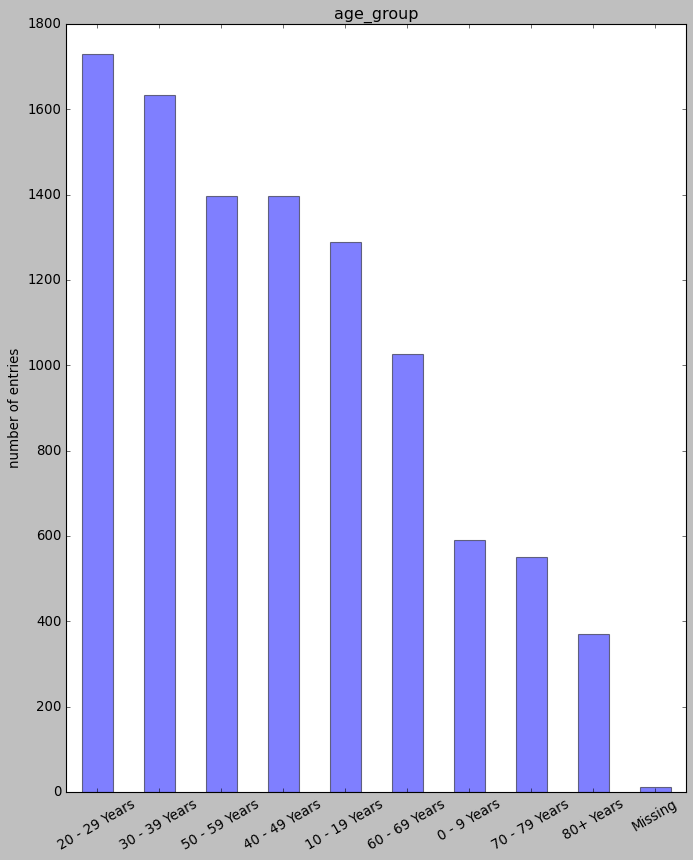

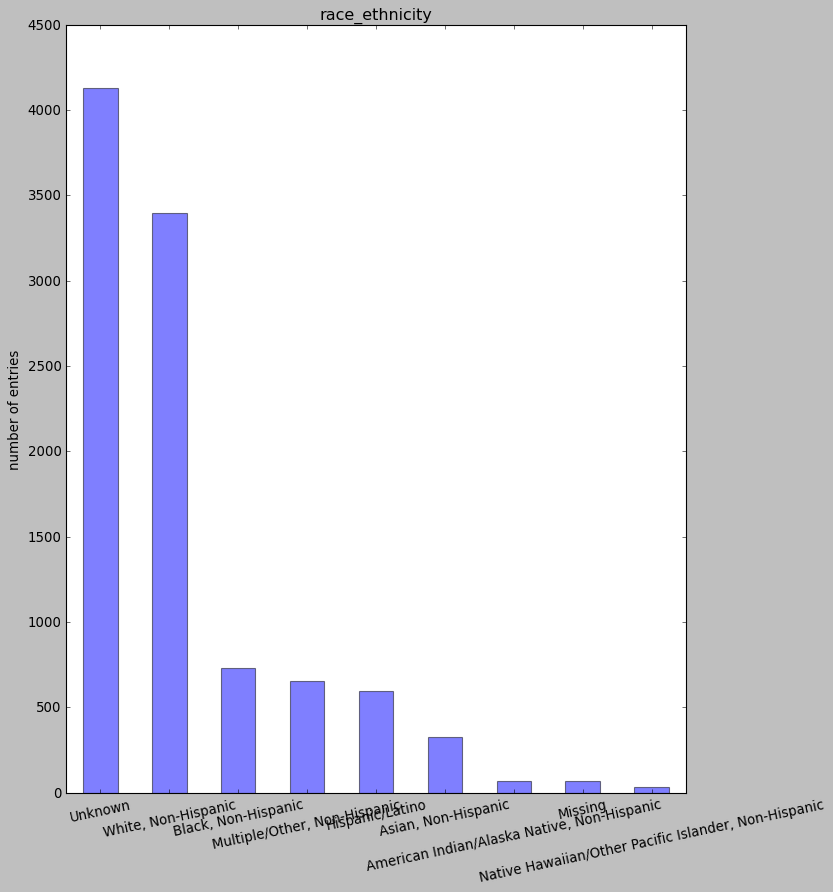

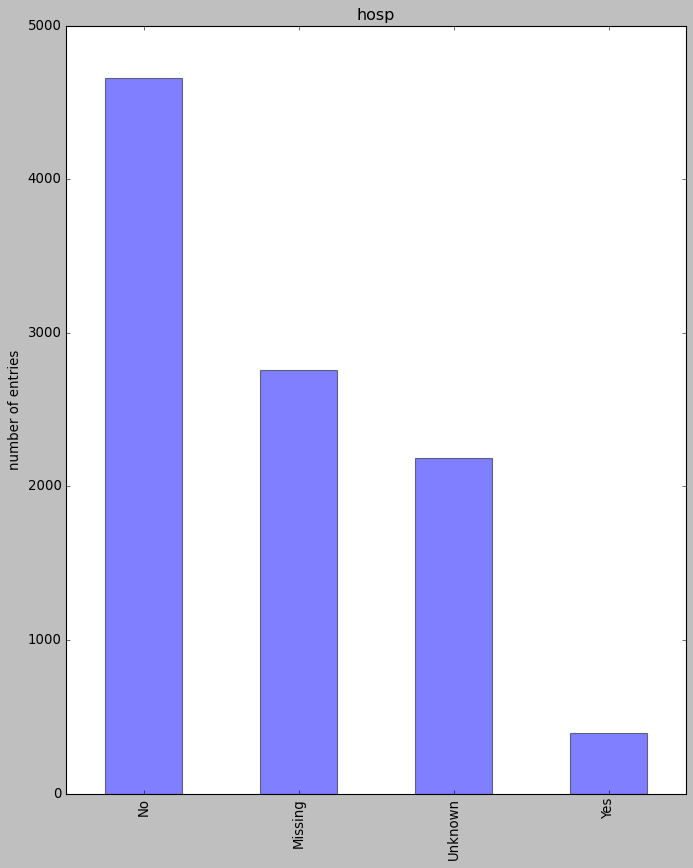

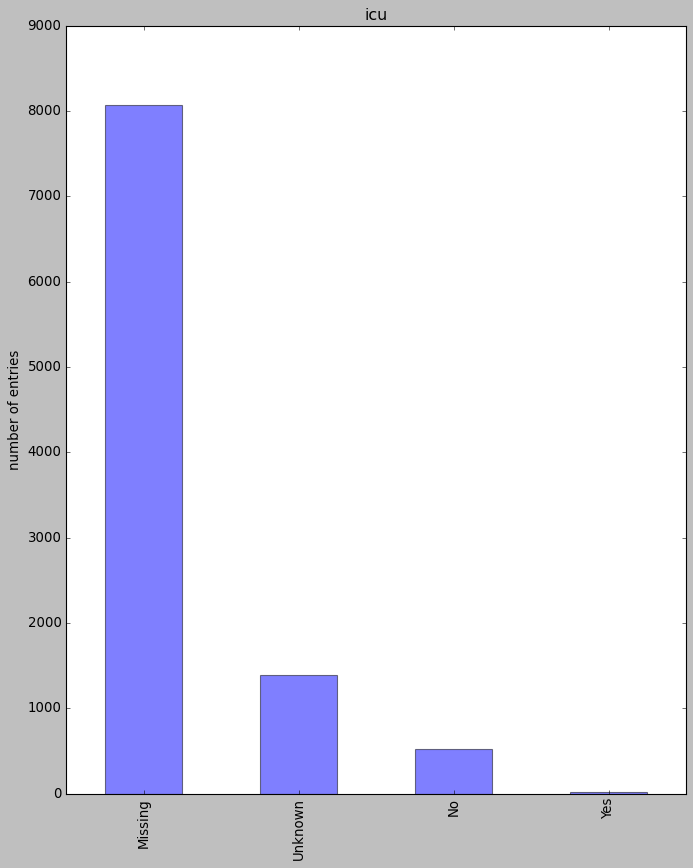

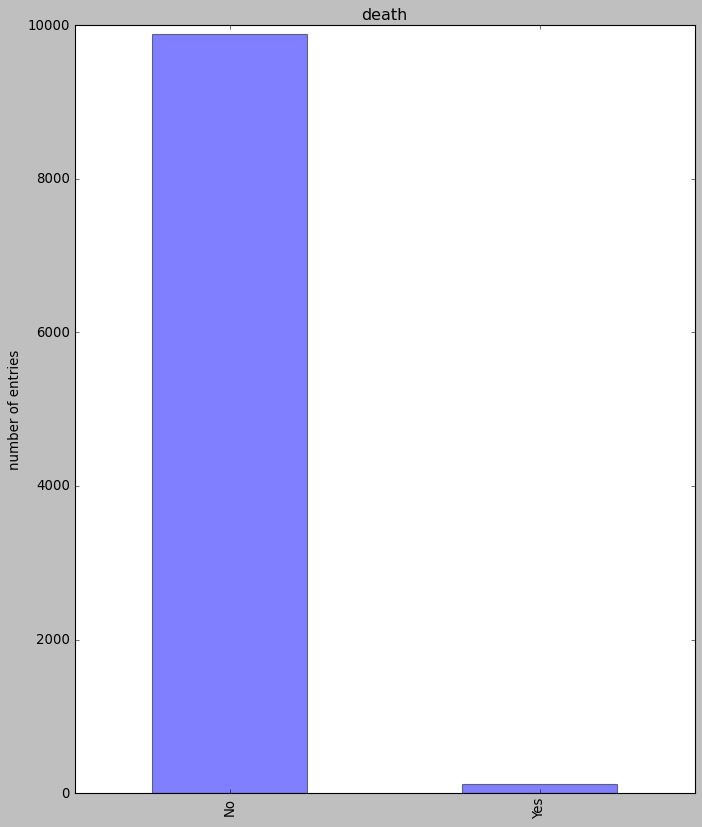

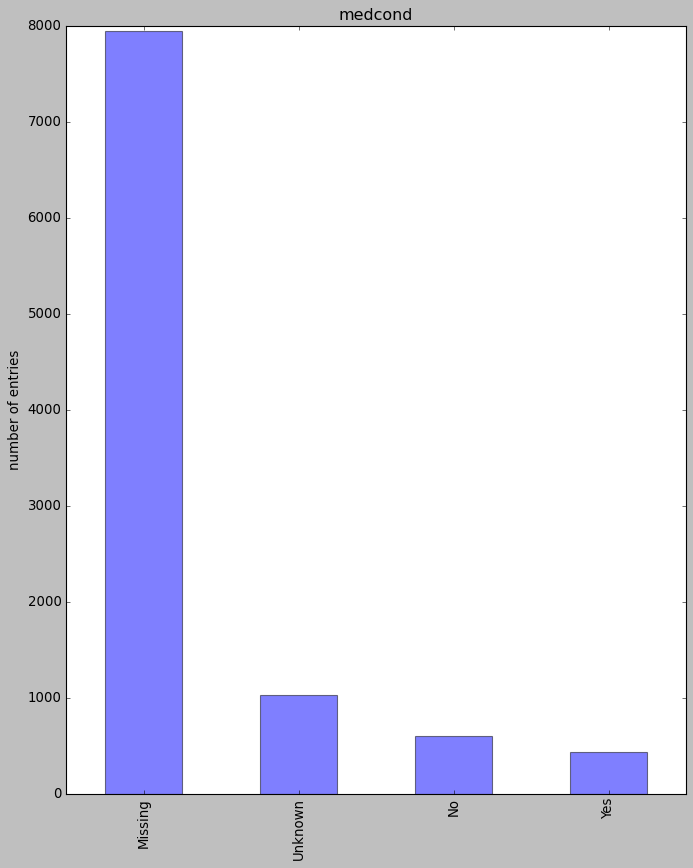

In [50]:
# Plot bar charts for all categorical features and save them in a single PDF file

plt.style.use('classic')
plt.tight_layout()

# We can set the parameters for .value_counts() to not drop the na. This allows us to see missing data in our 
# categorical features.
with PdfPages('covid19-cdc-19200690-DataQualityReport-CategoricalFeatures_barcharts_1-1.pdf') as pp:
    for column in categorical:
        f = df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(10,12), alpha=0.5)
        plt.ylabel('number of entries')
        if column == 'status':
            plt.xticks(rotation=0)
        elif column == 'age_group':
            plt.xticks(rotation=30)
        elif column == 'race_ethnicity':
            plt.xticks(rotation=12)
#         pp.savefig(f.get_figure())
        plt.show()

In [51]:
for row in df_continuous_columns_data_quality_report_table:
    print(df_continuous_columns_data_quality_report_table[row])
    print()

earliest_date    10000
report_date       7835
posSpec_date      2555
onset             4162
Name: count, dtype: object

earliest_date   2021-01-29 09:49:58.080000000
report_date     2021-02-01 11:15:03.790682880
posSpec_date    2021-01-29 23:23:55.772994304
onset           2021-01-29 13:35:50.312349952
Name: mean, dtype: datetime64[ns]

earliest_date   2021-01-19
report_date     2020-07-17
posSpec_date    2020-07-17
onset           2021-01-19
Name: min, dtype: datetime64[ns]

earliest_date   2021-01-23
report_date     2021-01-26
posSpec_date    2021-01-24
onset           2021-01-23
Name: 25%, dtype: datetime64[ns]

earliest_date   2021-01-29
report_date     2021-02-01
posSpec_date    2021-01-29
onset           2021-01-29
Name: 50%, dtype: datetime64[ns]

earliest_date   2021-02-04
report_date     2021-02-08
posSpec_date    2021-02-05
onset           2021-02-04
Name: 75%, dtype: datetime64[ns]

earliest_date   2021-02-13
report_date     2021-02-27
posSpec_date    2021-02-23
onset       

# 2). Prepare a data quality plan for the cleaned CSV file.

## List of issues identified in the data quality Report:
- Duplicate rows: there are 473 rows that are duplicates.
- Logical integrity – 'earliest_date': 68 rows have a column that has an earlier date than the 'earliest_date' column.
- Logical integrity – 'status': 215 rows have a value of 'Probable Case' for the 'status' column, but also have a value for the 'posSpec_date' column – which indicates that they are a confirmed case.
- Continuous features – 'posSpec_date': the 'posSpec_date' column is missing 72.74% of its values.
- Continuous features – 'onset': the 'onset' column is missing 49.16% of its values.
- Categorical features – 'icu': the 'icu' column is missing 89.35% of its values.
- Categorical features – 'medcond': the 'medcond' column is missing 82.83% of its values.
- Categorical features – 'sex': the 'sex' column has 0.82 % of its values missing.
- Categorical features – 'age_group': the 'age_group' column has 0.1% of its values missing.

## Propose solutions to deal with the problems identified.  
#### 1. Duplicate rows
- No action will be taken on duplicate rows: there is nothing to uniquely a person in the dataset. Therefore there is no indicator that these rows are duplicates rather than entries for people who have the same details listed in the dataset. This is why I chose to keep them rather than drop them.  

#### 2. Logical Integrity – 'earliest_date'
- The rows that fail this test will have the value of their 'earliest_date' column changed to whatever the minimum value for the continuous features of that row is. The 'earliest_date' column is simply the column that has the earliest date available for the entry, so there is no need to drop the rows here.

#### 3. Logical Integrity – 'status'
- The rows that fail this test will be dropped from the dataset. There is no way of knowing for these rows, which entry was the mistake: the entry in the ‘status’ column or the entry in the ‘posSpec_date’ column.

#### 4. Continuous features – 'posSpec_date'
- The 'posSpec_date' column will be dropped from the dataset. It is missing 72.74% of its values, and there are no rows reliant on this column alone for dates.

#### 5. Continuous features – 'onset'
- The 'onset' column will be dropped from the dataset. It is missing 49.16% of its values. This, in combination with the imperfect nature of this data – it is easily misremembered or mistaken by pepople – has led to the decision to the drop this column.

#### 6. Categorical features – 'icu'
- The 'icu' column will be dropped from the dataset as it is missing 89.35% of its values.

#### 7. Categorical features – 'medcond'
- The 'medcond' column will be dropped from the dataset as it is missing 82.83% of its values.

#### 8. Categorical features – 'sex'
- Any rows with a missing value for the 'sex' column will be dropped from the dataset. It will not result in much lost data – just 0.82% – and knowledge of the sex of the patient is important for identifying trends related to the target feature.

#### 9. Categorical features – 'age_group'
- Any rows with a missing value for the 'age_group' column will be dropped from the dataset. This will not lose much data – just 0.1% – and knowing the age group of each patient is useful information in identifying trends related to the target feature.

## Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 

#### 1. Duplicate rows
- nothing to be done here

#### 2. Logical Integrity – 'earliest_date'
- Here we iterating through the list of row indexes where the row contains a continuous feature whose date is earlier than that of its 'earliest_date' column.
  - for each of these rows, we replace its 'earliest_date' value with that of whatever continuous feature column has the minimum value

In [52]:
# some of the techniques for this cell were adapted from the two links below
# https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
# https://stackoverflow.com/questions/59879720/find-min-value-column-and-min-value-column-name-in-python-dataframe

for row in failed_rows_earliest_date:
    print(f'For row {row}, we will replace {df.loc[row]["earliest_date"]} with {df[continuous].loc[row].min()}')
    df.at[row, "earliest_date"] = df.at[row, df[continuous].idxmin(axis='columns')[row]]

For row 136, we will replace 2021-02-09 00:00:00 with 2021-02-08 00:00:00
For row 137, we will replace 2021-01-30 00:00:00 with 2021-01-06 00:00:00
For row 275, we will replace 2021-01-23 00:00:00 with 2021-01-22 00:00:00
For row 1363, we will replace 2021-01-19 00:00:00 with 2021-01-18 00:00:00
For row 2387, we will replace 2021-01-23 00:00:00 with 2020-12-16 00:00:00
For row 2521, we will replace 2021-02-07 00:00:00 with 2021-01-08 00:00:00
For row 2856, we will replace 2021-01-27 00:00:00 with 2021-01-24 00:00:00
For row 2920, we will replace 2021-01-26 00:00:00 with 2020-07-17 00:00:00
For row 3289, we will replace 2021-02-08 00:00:00 with 2021-02-05 00:00:00
For row 3419, we will replace 2021-01-28 00:00:00 with 2021-01-27 00:00:00
For row 4936, we will replace 2021-01-30 00:00:00 with 2021-01-21 00:00:00
For row 5068, we will replace 2021-02-11 00:00:00 with 2021-02-10 00:00:00
For row 5130, we will replace 2021-01-23 00:00:00 with 2021-01-19 00:00:00
For row 5859, we will replac

**Now we can perform the check again, on the entire dataframe to see if any rows in the dataframe have a date that is earlier than the value in the "earliest_date" column**

In [53]:
failed_rows_earliest_date_2 = []

for i in range(df.shape[0]):
    if df.loc[i]['report_date'] < df.loc[i]['earliest_date'] or df.loc[i]['posSpec_date'] < df.loc[i]['earliest_date']\
    or df.loc[i]['onset'] < df.loc[i]['earliest_date']:
        failed_rows_earliest_date_2.append(i)
print(f'There are {len(failed_rows_earliest_date_2)} rows that have a date earlier than the "earliest_column" date.')
print()
print('Rows that have a date earlier than the "earliest_date" column:', failed_rows_earliest_date_2)

There are 0 rows that have a date earlier than the "earliest_column" date.

Rows that have a date earlier than the "earliest_date" column: []


**As we can see, there are no rows whose continuous columns have a date earlier than its 'earliest_date' column.**

#### 3. Logical Integrity – 'status'

- Here we 215 rows have a value of 'Probable Case' for the 'status' column, but also have a value for the 'posSpec_date' column – which indicates that they are a confirmed case.
- The indexes of these rows are stored in the list 'failed_rows_PosSpec_date_status' from when the logical error tests were done.
- We simply assign to the variable for the dataframe, the value of the dataframe that has dropped all rows with the indexes in the list 'failed_rows_PosSpec_date_status'.

In [54]:
print(f'There are {len(failed_rows_PosSpec_date_status)} rows that have a "probable_case" for the status column, \
and a not null value for the posSpec_date column.')
print()
print(f'Rows that have a "probable_case" for the status column,\
and a not null value for the posSpec_date column: {failed_rows_PosSpec_date_status}.')

df = df.drop(failed_rows_PosSpec_date_status)

There are 344 rows that have a "probable_case" for the status column, and a not null value for the posSpec_date column.

Rows that have a "probable_case" for the status column,and a not null value for the posSpec_date column: [23, 41, 44, 83, 91, 134, 217, 224, 258, 304, 315, 337, 340, 342, 471, 484, 501, 546, 560, 561, 636, 640, 669, 675, 681, 784, 802, 806, 850, 952, 956, 986, 1005, 1021, 1031, 1072, 1102, 1108, 1141, 1144, 1149, 1182, 1198, 1214, 1252, 1261, 1389, 1408, 1430, 1434, 1436, 1476, 1492, 1557, 1562, 1583, 1592, 1617, 1640, 1689, 1731, 1737, 1750, 1755, 1763, 1777, 1782, 1859, 1862, 1890, 1894, 1914, 1920, 1922, 1952, 2045, 2066, 2103, 2109, 2112, 2129, 2169, 2176, 2184, 2195, 2201, 2220, 2221, 2240, 2281, 2301, 2304, 2309, 2336, 2348, 2371, 2390, 2401, 2421, 2425, 2529, 2531, 2540, 2545, 2555, 2574, 2575, 2609, 2631, 2636, 2684, 2723, 2734, 2745, 2800, 2801, 2892, 2906, 2909, 2962, 2979, 2996, 3037, 3054, 3063, 3070, 3099, 3114, 3118, 3143, 3158, 3164, 3184, 3282, 3304, 

**Now we perform the check again, on the entire dataframe, to see if any rows have a value of 'Probable Case' for the 'status' column, but also have a value for the 'posSpec_date' column.**
- We also need to reset the indexes for the dataframe, so that it can be iterated through without throwing an error.

In [55]:
failed_rows_PosSpec_date_status_2 = []
df = df.reset_index(drop=True)

for i in range(df.shape[0]):
    if not pd.isnull(df.loc[i]['posSpec_date']) and df.loc[i]['status'] == 'Probable Case':
        failed_rows_PosSpec_date_status_2.append(i)
        
print(f'There are {len(failed_rows_PosSpec_date_status_2)} rows that have a "probable_case" for the status column, \
and a not null value for the posSpec_date column.')
print()
print(f'Rows that have a "probable_case" for the status column,\
and a not null value for the posSpec_date column: {failed_rows_PosSpec_date_status_2}.')

There are 0 rows that have a "probable_case" for the status column, and a not null value for the posSpec_date column.

Rows that have a "probable_case" for the status column,and a not null value for the posSpec_date column: [].


In [56]:
df.head()

,earliest_date,report_date,posSpec_date,onset,status,sex,age_group,race_ethnicity,hosp,icu,death,medcond
0,2021-01-22,2021-01-22,NaT,NaT,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,Missing,No,Missing
1,2021-01-26,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
2,2021-02-03,2021-02-05,NaT,2021-02-03,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Missing,Missing,No,Missing
3,2021-02-05,2021-02-05,2021-02-07,2021-02-05,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,Unknown,No,No
4,2021-01-27,2021-01-27,NaT,NaT,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing


**As we can see, there are no rows that have a "probable_case" for the status column, and a not-null value for the posSpec_date column.**

#### 4. Continuous features – 'posSpec_date'

- Here we are dropping the 'posSpec_date' column from the dataframe.
  - It is missing 72.74% of its values.
  - It is not singly relied upon for the date in any row.
- We simply assign to the dataframe, the value of the dataframe that has dropped the 'posSpec_date' column.

In [57]:
df = df.drop(columns=['posSpec_date'])

**Now we check the dataframe to see if the 'posSpec_date' column is present.**

In [58]:
df.head()

,earliest_date,report_date,onset,status,sex,age_group,race_ethnicity,hosp,icu,death,medcond
0,2021-01-22,2021-01-22,NaT,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,Missing,No,Missing
1,2021-01-26,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
2,2021-02-03,2021-02-05,2021-02-03,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Missing,Missing,No,Missing
3,2021-02-05,2021-02-05,2021-02-05,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,Unknown,No,No
4,2021-01-27,2021-01-27,NaT,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing


**As we can see, the 'posSpec_date' column is not present in the dataframe anymore.**

#### 5. Continuous features – 'onset'

- Here we are dropping the 'onset' column from the dataframe.
  - It is missing 49.16% of its values.
  - Similarly to the 'posSpec_date' column, it is not singly relied upon for the date in any row.
- We simply assign to the dataframe, the value of the dataframe that has dropped the 'onset' column.

In [59]:
df = df.drop(columns=['onset'])

**Now we check to see if the dataframe contains an 'onset' column.**

In [60]:
df.head()

,earliest_date,report_date,status,sex,age_group,race_ethnicity,hosp,icu,death,medcond
0,2021-01-22,2021-01-22,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,Missing,No,Missing
1,2021-01-26,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
2,2021-02-03,2021-02-05,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Missing,Missing,No,Missing
3,2021-02-05,2021-02-05,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,Unknown,No,No
4,2021-01-27,2021-01-27,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing


**It can be seen that the dataframe has dropped the 'onset' column.**

#### 6. Categorical features – 'icu'

- Here we drop the 'icu' column from the dataframe.
  - It is missing 89.35% of its values.
- We assign to the dataframe, the value of the dataframe that has droppped the 'icu' column.

In [61]:
df = df.drop(columns=['icu'])

**Now we check to see if the dataframe contains an 'icu' column.**

In [62]:
df.head()

,earliest_date,report_date,status,sex,age_group,race_ethnicity,hosp,death,medcond
0,2021-01-22,2021-01-22,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,No,Missing
1,2021-01-26,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,No,Missing
2,2021-02-03,2021-02-05,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Missing,No,Missing
3,2021-02-05,2021-02-05,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,No,No
4,2021-01-27,2021-01-27,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No,Missing


**We can see that the dataframe no longer contains an 'icu' column.**

#### 7. Categorical features – 'medcond'

- We will now drop the 'medcond' column from the dataframe.
  - It has 82.83% of its values missing.

In [63]:
df = df.drop(columns=['medcond'])

**Check to see if the dataframe has successfully dropped the 'medcond' column.**

In [64]:
df.head()

,earliest_date,report_date,status,sex,age_group,race_ethnicity,hosp,death
0,2021-01-22,2021-01-22,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,No
1,2021-01-26,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,No
2,2021-02-03,2021-02-05,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Missing,No
3,2021-02-05,2021-02-05,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,No
4,2021-01-27,2021-01-27,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No


**We can see that the dataframe no longer has a 'medcond' column**

#### 8. Categorical features – 'sex'

- Here we will iterate through the dataframe, and delete any rows to see if the value for the 'sex' column is missing or unknown.
- We reset the indexes for the dataframe to make sure no errors are thrown when iterating through it.

In [65]:
df = df.reset_index(drop=True)

for i in range(df.shape[0]):
    if df.loc[i]['sex'] == 'Missing' or df.loc[i]['sex'] == 'Unknown':
        df = df.drop(i)

**Now we make sure that there are no values of 'Missing' or 'Unknown' for the 'sex' column.**

In [66]:
df['sex'].value_counts()

Female     4945
Male       4628
Other         1
Missing       0
Unknown       0
Name: sex, dtype: int64

**We can see that there are no values missing or unkown for the 'sex' column now.**

#### 9. Categorical features – 'age_group'

- Finally we check the rows that have a value of 'Missing' or 'Unknown' for the 'age_group' column.
- We reset the indexes of the dataframe before and after removing the rows to make sure no errors will be thrown for indexing.

In [67]:
df = df.reset_index(drop=True)

for i in range(df.shape[0]):
    if df.loc[i]['age_group'] == 'Missing' or df.loc[i]['age_group'] == 'Unknown':
        df = df.drop(i)
        
df = df.reset_index(drop=True)

**Now we check that there are no rows that have a value of 'Missing' or 'Unknown' for the 'age_group' column.**

In [68]:
df['age_group'].value_counts()

20 - 29 Years    1650
30 - 39 Years    1570
40 - 49 Years    1342
50 - 59 Years    1339
10 - 19 Years    1224
60 - 69 Years     984
0 - 9 Years       566
70 - 79 Years     530
80+ Years         358
Missing             0
Name: age_group, dtype: int64

**As we can see, there are no values of 'Missing' or 'Unknown' for the 'age_group' column.**

### Summary of data quality plan:

**Variable Names**|**Data Quality Issue**|**Handling Strategy**
:-----:|:-----:|:-----:
earliest\_date|logical errors|change value for  the 'earliest\_date' column to the minimum value for the column
report\_date|missing 24.08% of its values.|do nothing
posSpec\_date|missing 72.74% of its values|drop column
onset|missing 49.16 % of its values; imperfect method of data collection|drop column
status|logical errors|remove failed rows
sex|missing 0.82% of its values|remove rows with missing values
age\_group|missing 0.1% of its values|remove rows with missing values
race\_ethnicity|missing 42.54% of its values|do nothing
hosp|missing 41.25% of its values|do nothing
icu|missing 89.35% of its values|drop column
death|none|do nothing
medcond|missing 82.83% of its values|do nothing

- table saved as picture in Data_Quality_Plan.pdf
- table made with excel and pasted into generator here:
https://jakebathman.github.io/Markdown-Table-Generator/

**The dataframe with descriptive statistics of its continuous features now:**

In [69]:
continuous = df.select_dtypes('datetime64[ns]').columns
df[continuous].describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
earliest_date,9563,2021-01-29 07:36:24.544599040,2020-07-17,2021-01-23,2021-01-29,2021-02-04,2021-02-13
report_date,7438,2021-02-01 12:31:10.180155904,2020-07-17,2021-01-26,2021-02-01,2021-02-08,2021-02-27


**The dataframe with descriptive statistics of its categorical features now:**

In [70]:
categorical = df.select_dtypes('category').columns
df[categorical].describe().T

,count,unique,top,freq
status,9563,2,Laboratory-confirmed case,8825
sex,9563,3,Female,4938
age_group,9563,9,20 - 29 Years,1650
race_ethnicity,9563,9,Unknown,3956
hosp,9563,4,No,4490
death,9563,2,No,9444


## Save the new dataframe to a csv file

In [71]:
# df.to_csv('covid19-cdc-19200690_cleaned_1_2.csv')

# (3). Exploring relationships between feature pairs

## - Choose a subset of features you find promising and plot pairwise feature interactions. Explain your choices.

I will look at the following continuous feature for pairwise interactions:
- earliest_date
<br><br>

I will look at the following categorical features for pairwise interactions:
- status
- sex
- age_group
- race_ethnicity
- hosp
- death

I have chosen each of these features because each one can help with identifying what is likely to contribute to a death in relation to COVID-19 cases.

## Categorical vs Categorical plots

### - Comparing sex with status

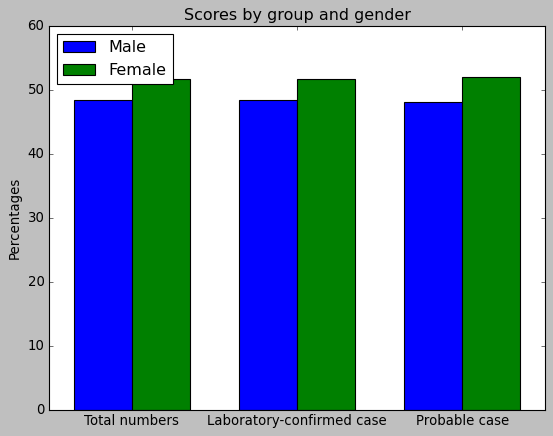

In [72]:
# adapted from:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

plt.style.use('classic')

titles_sex_status = ['Total numbers', 'Laboratory-confirmed case', 'Probable case']
male = df['sex']=='Male'
female = df['sex']=='Female'
confirmed = df['status']=='Laboratory-confirmed case'
probable = df['status']=='Probable Case'

male_confirmed = df[male & confirmed]
male_probable = df[male & probable]

female_confirmed = df[female & confirmed]
female_probable = df[female & probable]

total_percentage_male = 100 * (len(df[male])/df.shape[0])
total_percentage_female = 100 * (len(df[female])/df.shape[0])

confirmed_percentage_male = 100 * (len(male_confirmed)/len(df[confirmed]))
confirmed_percentage_female = 100 * (len(female_confirmed)/len(df[confirmed]))

probable_percentage_male = 100 * (len(male_probable)/len(df[probable]))
probable_percentage_female = 100 * (len(female_probable)/len(df[probable]))


male_list = [total_percentage_male, confirmed_percentage_male, probable_percentage_male]
female_list = [total_percentage_female, confirmed_percentage_female, probable_percentage_female]

x = np.arange(len(titles_sex_status))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_list, width, label='Male')
rects2 = ax.bar(x + width/2, female_list, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(titles_sex_status)
ax.legend(loc='upper left')

plt.show()

### - Comparing age group with status

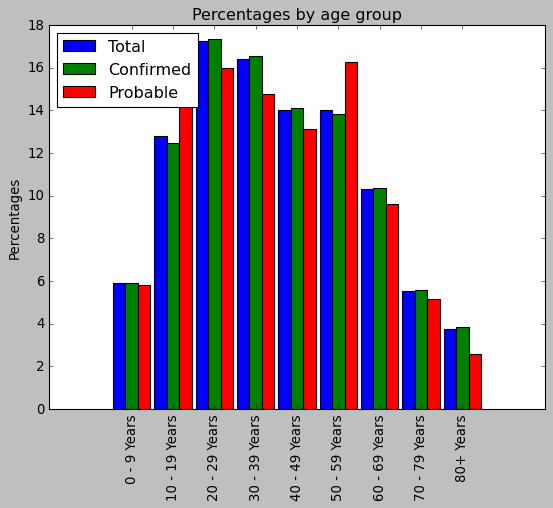

In [73]:
plt.style.use('classic')

titles_age_status = [title for title in df['age_group'].unique()]
titles_age_status.sort()

zero = df['age_group']=='0 - 9 Years'
ten = df['age_group']=='10 - 19 Years'
twenty = df['age_group']=='20 - 29 Years'
thirty = df['age_group']=='30 - 39 Years'
forty = df['age_group']=='40 - 49 Years'
fifty = df['age_group']=='50 - 59 Years'
sixty = df['age_group']=='60 - 69 Years'
seventy = df['age_group']=='70 - 79 Years'
eighty = df['age_group']=='80+ Years'

confirmed = df['status']=='Laboratory-confirmed case'
probable = df['status']=='Probable Case'

age_categories = [zero, ten, twenty, thirty, forty, fifty, sixty, seventy, eighty]
total_percentage_list = []
confirmed_percentage_list = []
probable_percentage_list = []



for i in range(len(age_categories)):
    total_percentage_list.append(100*(len(df[age_categories[i]])/df.shape[0]))
    confirmed_percentage_list.append(100*(len(df[age_categories[i] & confirmed])/len(df[confirmed])))
    probable_percentage_list.append(100*(len(df[age_categories[i] & probable])/len(df[probable])))


x = np.arange(len(titles_age_status))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, total_percentage_list, width, label='Total')
rects2 = ax.bar(x, confirmed_percentage_list, width, label='Confirmed')
rects3 = ax.bar(x + width, probable_percentage_list, width, label='Probable')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
ax.set_title('Percentages by age group')
ax.set_xticks(x)
ax.set_xticklabels(titles_age_status, rotation=90)
ax.legend(loc='upper left')

plt.show()

### - Comparing race & ethnicity with status

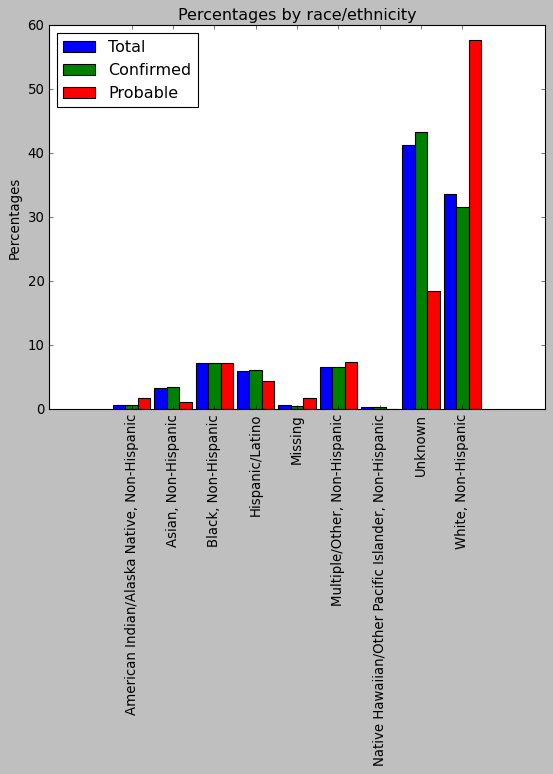

In [74]:
plt.style.use('classic')

titles_race_ethnicity = [title for title in df['race_ethnicity'].unique()]
titles_race_ethnicity.sort()

confirmed = df['status']=='Laboratory-confirmed case'
probable = df['status']=='Probable Case'

total_percentage_list = []
confirmed_percentage_list = []
probable_percentage_list = []

for i in range(len(titles_race_ethnicity)):
    total_percentage_list.append(100*(len(df[df['race_ethnicity'] == titles_race_ethnicity[i]])/df.shape[0]))
    confirmed_percentage_list.append(100*(len(df[(df['race_ethnicity'] == titles_race_ethnicity[i]) & confirmed])/len(df[confirmed])))
    probable_percentage_list.append(100*(len(df[(df['race_ethnicity'] == titles_race_ethnicity[i]) & probable])/len(df[probable])))

x = np.arange(len(titles_age_status))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, total_percentage_list, width, label='Total')
rects2 = ax.bar(x, confirmed_percentage_list, width, label='Confirmed')
rects3 = ax.bar(x + width, probable_percentage_list, width, label='Probable')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
ax.set_title('Percentages by race/ethnicity')
ax.set_xticks(x)
ax.set_xticklabels(titles_race_ethnicity, rotation=90)
ax.legend(loc='upper left')

plt.show()    


### - Comparing sex with death

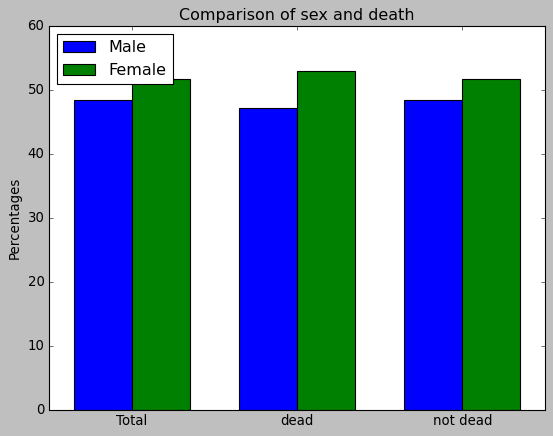

In [75]:
titles_sex_death = ['Total', 'dead', 'not dead']

total_percent_male = 100*len(df[df['sex']=='Male'])/df.shape[0]
total_percent_female = 100*len(df[df['sex']=='Female'])/df.shape[0]

death_yes_percent_male = 100*len(df[(df['sex']=='Male')&(df['death']=='Yes')])/len(df[df['death']=='Yes'])
death_yes_percent_female = 100*len(df[(df['sex']=='Female')&(df['death']=='Yes')])/len(df[df['death']=='Yes'])

death_no_percent_male = 100*len(df[(df['sex']=='Male')&(df['death']=='No')])/len(df[df['death']=='No'])
death_no_percent_female = 100*len(df[(df['sex']=='Female')&(df['death']=='No')])/len(df[df['death']=='No'])

male_list = [total_percent_male, death_yes_percent_male, death_no_percent_male]
female_list = [total_percent_female, death_yes_percent_female, death_no_percent_female]

x = np.arange(len(titles_sex_status))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_list, width, label='Male')
rects2 = ax.bar(x + width/2, female_list, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
ax.set_title('Comparison of sex and death')
ax.set_xticks(x)
ax.set_xticklabels(titles_sex_death)
ax.legend(loc='upper left')

plt.show()

### - Comparing age group with deaths

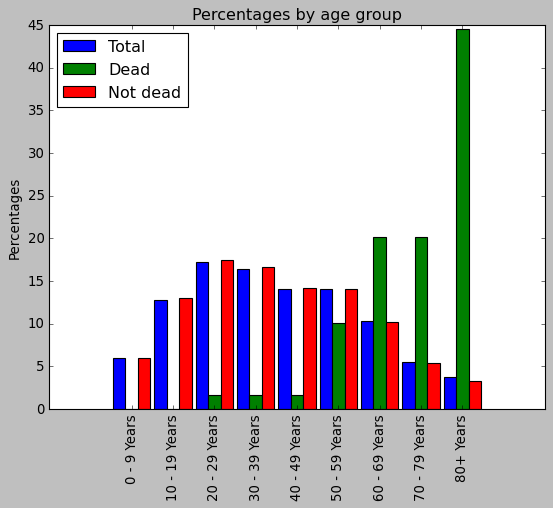

In [76]:
plt.style.use('classic')

titles_age_death = [title for title in df['age_group'].unique()]
titles_age_death.sort()

zero = df['age_group']=='0 - 9 Years'
ten = df['age_group']=='10 - 19 Years'
twenty = df['age_group']=='20 - 29 Years'
thirty = df['age_group']=='30 - 39 Years'
forty = df['age_group']=='40 - 49 Years'
fifty = df['age_group']=='50 - 59 Years'
sixty = df['age_group']=='60 - 69 Years'
seventy = df['age_group']=='70 - 79 Years'
eighty = df['age_group']=='80+ Years'

death_yes = df['death']=='Yes'
death_no = df['death']=='No'

age_categories = [zero, ten, twenty, thirty, forty, fifty, sixty, seventy, eighty]
total_percentage_list = []
death_percentage_list = []
not_death_percentage_list = []



for i in range(len(age_categories)):
    total_percentage_list.append(100*(len(df[age_categories[i]])/df.shape[0]))
    death_percentage_list.append(100*(len(df[age_categories[i] & death_yes])/len(df[death_yes])))
    not_death_percentage_list.append(100*(len(df[age_categories[i] & death_no])/len(df[death_no])))


x = np.arange(len(titles_age_death))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, total_percentage_list, width, label='Total')
rects2 = ax.bar(x, death_percentage_list, width, label='Dead')
rects3 = ax.bar(x + width, not_death_percentage_list, width, label='Not dead')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
ax.set_title('Percentages by age group')
ax.set_xticks(x)
ax.set_xticklabels(titles_age_status, rotation=90)
ax.legend(loc='upper left')

plt.show()

### - Comparing ethnicity with deaths

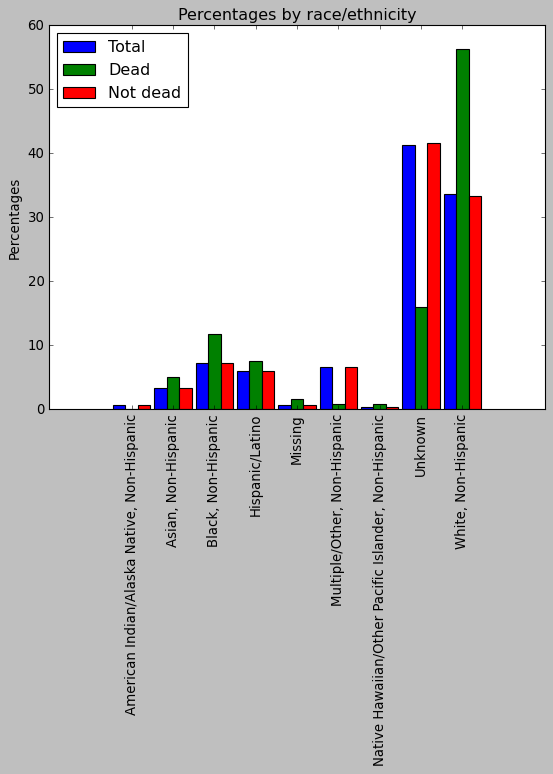

In [77]:
plt.style.use('classic')

titles_race_ethnicity = [title for title in df['race_ethnicity'].unique()]
titles_race_ethnicity.sort()

death_yes = df['death']=='Yes'
death_no = df['death']=='No'

total_percentage_list = []
death_percentage_list = []
not_death_percentage_list = []

for i in range(len(titles_race_ethnicity)):
    total_percentage_list.append(100*(len(df[df['race_ethnicity'] == titles_race_ethnicity[i]])/df.shape[0]))
    death_percentage_list.append(100*(len(df[(df['race_ethnicity'] == titles_race_ethnicity[i]) & death_yes])/len(df[death_yes])))
    not_death_percentage_list.append(100*(len(df[(df['race_ethnicity'] == titles_race_ethnicity[i]) & death_no])/len(df[death_no])))

x = np.arange(len(titles_race_ethnicity))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, total_percentage_list, width, label='Total')
rects2 = ax.bar(x, death_percentage_list, width, label='Dead')
rects3 = ax.bar(x + width, not_death_percentage_list, width, label='Not dead')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
ax.set_title('Percentages by race/ethnicity')
ax.set_xticks(x)
ax.set_xticklabels(titles_race_ethnicity, rotation=90)
ax.legend(loc='upper left')

plt.show()  

### - Comparing ethnicity with hospital

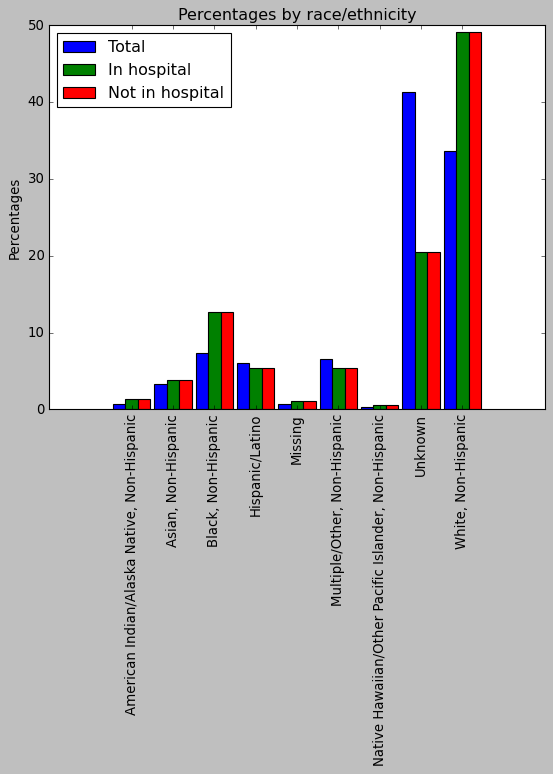

In [78]:
plt.style.use('classic')

titles_race_ethnicity = [title for title in df['race_ethnicity'].unique()]
titles_race_ethnicity.sort()

hosp_yes = df['hosp']=='Yes'
hosp_no = df['hosp']=='No'

total_percentage_list = []
hosp_yes_percentage_list = []
hosp_no_percentage_list = []

for i in range(len(titles_race_ethnicity)):
    total_percentage_list.append(100*(len(df[df['race_ethnicity'] == titles_race_ethnicity[i]])/df.shape[0]))
    hosp_yes_percentage_list.append(100*(len(df[(df['race_ethnicity'] == titles_race_ethnicity[i]) & hosp_yes])/len(df[hosp_yes])))
    hosp_no_percentage_list.append(100*(len(df[(df['race_ethnicity'] == titles_race_ethnicity[i]) & hosp_yes])/len(df[hosp_yes])))

x = np.arange(len(titles_race_ethnicity))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, total_percentage_list, width, label='Total')
rects2 = ax.bar(x, hosp_yes_percentage_list, width, label='In hospital')
rects3 = ax.bar(x + width, hosp_no_percentage_list, width, label='Not in hospital')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
ax.set_title('Percentages by race/ethnicity')
ax.set_xticks(x)
ax.set_xticklabels(titles_race_ethnicity, rotation=90)
ax.legend(loc='upper left')

plt.show()  

## - comparing number of hospitalisations with deaths

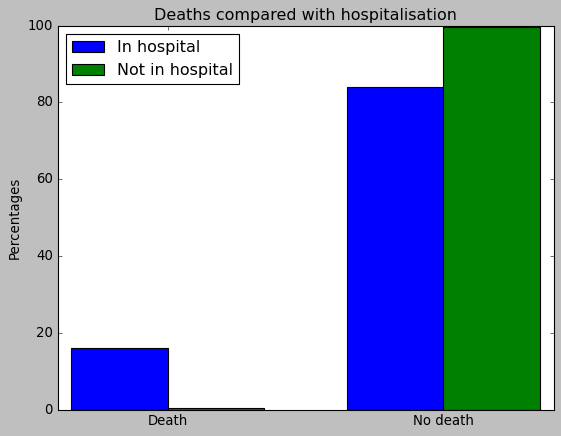

99.6881959910913

In [79]:
hosp_yes = df['hosp']=='Yes'
hosp_no = df['hosp']=='No'

dead_yes = df['death']=='Yes'
dead_no = df['death']=='No'

titles_hosp = ["in hospital", 'not in hosptial']

hosp_dead = 100*(len(df[hosp_yes & dead_yes])/len(df[hosp_yes]))
hosp_not_dead = 100*(len(df[hosp_yes & dead_no])/len(df[hosp_yes]))

no_hosp_dead = 100*(len(df[hosp_no & dead_yes])/len(df[hosp_no]))
no_hosp_no_dead = 100*(len(df[hosp_no & dead_no])/len(df[hosp_no]))

hosp_list = [hosp_dead, hosp_not_dead]
no_hosp_list = [no_hosp_dead, no_hosp_no_dead]

x = np.arange(len(titles_hosp))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hosp_list, width, label='In hospital')
rects2 = ax.bar(x + width/2, no_hosp_list, width, label='Not in hospital')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
ax.set_title('Deaths compared with hospitalisation')
ax.set_xticks(x)
ax.set_xticklabels(['Death', 'No death'])
ax.legend(loc='upper left')

plt.show()

no_hosp_no_dead


# Continuous vs Categorical

## - Plotting number of deaths per date

In [80]:
dateNums = {}
uniqueDates = df['earliest_date'].unique()
uniqueDates.sort()

deaths = df[df['death']=='Yes']

for date in uniqueDates:
    dateNums[date] = 0

In [81]:
for date in uniqueDates:
    for i in range(len(deaths)):
        if deaths.iloc[i]['earliest_date'] == date:
            dateNums[date]+=1

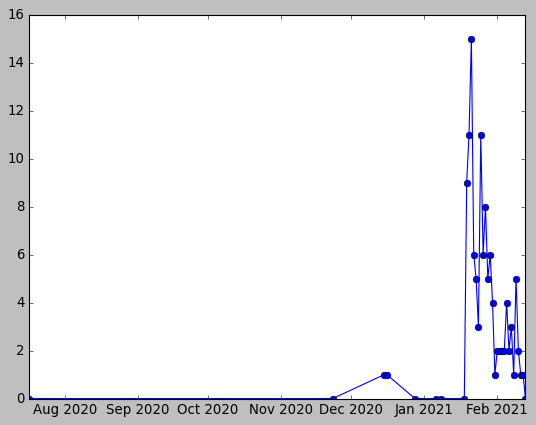

In [82]:
plt.style.use('classic')
plt.plot_date(uniqueDates, dateNums.values(), linestyle='solid')

## - Plotting number of deaths per month

In [83]:
deaths = df[df['death']=='Yes']['earliest_date']

<AxesSubplot:title={'center':'Number of deaths per month'}>

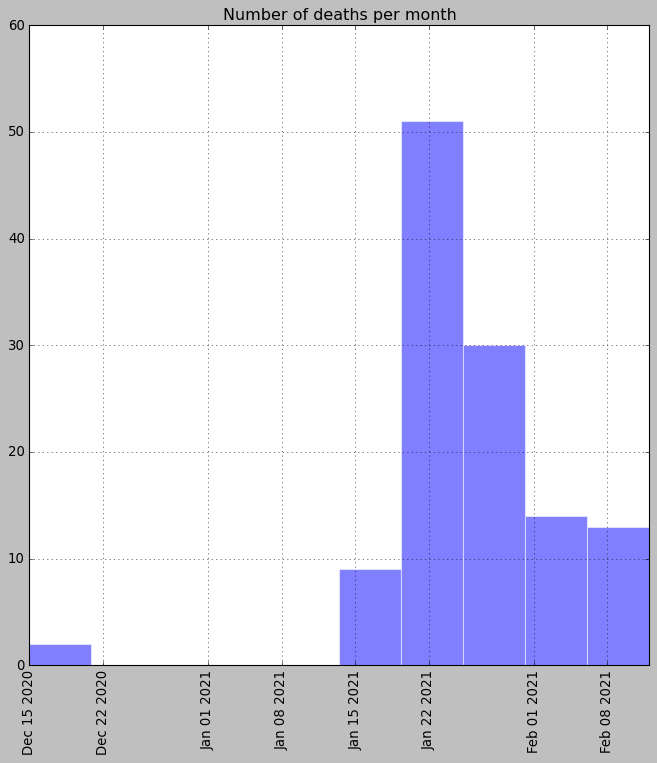

In [84]:
plt.figure()
plt.title('Number of deaths per month')
plt.style.use('classic')
deaths.hist(figsize=(10, 10), xrot = 90, edgecolor='white', alpha=0.5)

## - Plotting number of hospitalisations per month

In [85]:
hosps = df[df['hosp']=='Yes']['earliest_date']

<AxesSubplot:title={'center':'Number of hospitalisations per month'}>

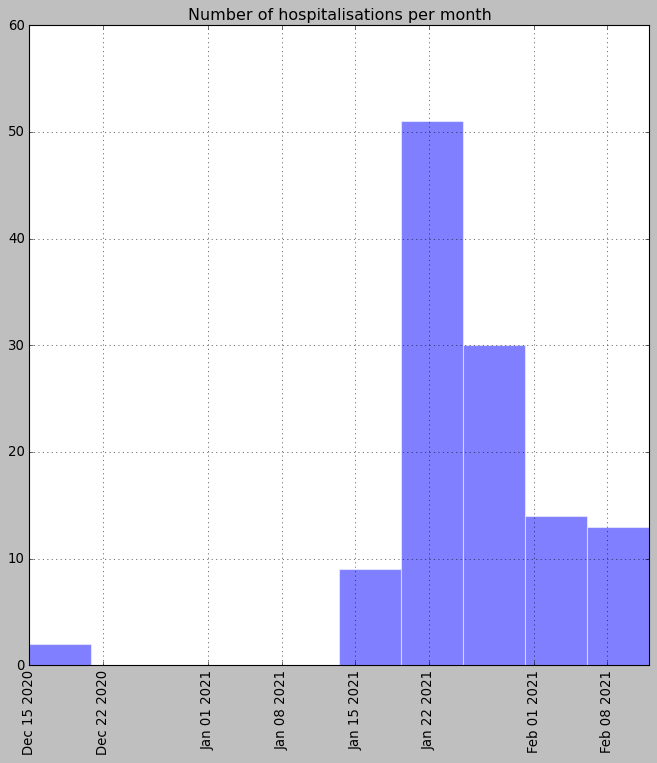

In [86]:
plt.figure()
plt.title('Number of hospitalisations per month')
plt.style.use('classic')
deaths.hist(figsize=(10, 10), xrot = 90, edgecolor='white', alpha=0.5)

## Findings:

- categorical vs categorical
  - I picked groups of categorical features that I thought I could compare with specific outcomes: such as how race_ethnicity correlated with deaths and confirmed positive cases.
  - There is a strong correlation between going to hospital and death.
  - There is also a very clear correlation between the deaths and increasing age – the percentage of deaths is far higher for the '60 - 69 Years', '70 - 79 Years' and '80+ Years' categories.
- continuous vs categorical
  - There were no findings here other than a pattern of the number of cases mirroring that of deaths: when the number of cases rose April 2020, so did the number of deaths. This was the same as the year went progressed, and the cases and deaths increased again in December.
  - There was also more evidence of correlation with hospitalisation and deaths: the more hospitalisations, the more deaths

# (4). Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome.
### Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name.

## Time difference
- This is interesting to track, as it is important to keep figures up to date, so that more data can be gathered and collated to continue to help identifying trends. Perhaps we may see that if the time difference between when the case may be first diagnosed or tested increases, the number of deaths may increase. This could also be indicative of hospital stress – if staff are too busy with patients, administrative work may be delayed.

In [87]:
time_dif = []

for i in range(df.shape[0]):
    time_dif.append((df.loc[i]['report_date'])-(df.loc[i]['earliest_date']))
    
df['time_dif'] = time_dif

In [88]:
df.head()

,earliest_date,report_date,status,sex,age_group,race_ethnicity,hosp,death,time_dif
0,2021-01-22,2021-01-22,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,No,0 days
1,2021-01-26,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,No,NaT
2,2021-02-03,2021-02-05,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Missing,No,2 days
3,2021-02-05,2021-02-05,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,No,0 days
4,2021-01-27,2021-01-27,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No,0 days


## Elderly
- Because the percentage of deaths went up from 60 years onwards, I thought it would be a good feature to have on the dataset to indicate that patients who are elderly will receive more attention. As we can see below, over 80% of the total deaths occur in elderly people.

In [89]:
elderly = []
for i in range(df.shape[0]):
    if df.loc[i]['age_group'] == '60 - 69 Years' or df.loc[i]['age_group'] == '70 - 79 Years' \
    or df.loc[i]['age_group'] == '80+ Years':
        elderly.append('Yes')
    else:
        elderly.append('No')
        
df['elderly'] = elderly

In [90]:
100* len(df[(df['death']=='Yes')&(df['elderly']=='Yes')])/len(df[df['death']=='Yes'])

84.87394957983193

## Quarter
- In the Data Quality Report, there were statistics on the continuous features, in terms of percentiles. But What I thought would be useful is to see how the cases are distributed according to time. So I made a quarter feature. If the case occurs in the first quartile of the span of time that cases are recorded, then it is designated as 'first', if the case occurs in the second quartile of the span of time that cases are recorded, then it is designated as 'second', and so on.

In [91]:
df[continuous].describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
earliest_date,9563,2021-01-29 07:36:24.544599040,2020-07-17,2021-01-23,2021-01-29,2021-02-04,2021-02-13
report_date,7438,2021-02-01 12:31:10.180155904,2020-07-17,2021-01-26,2021-02-01,2021-02-08,2021-02-27


In [92]:
quarterList = []

quarter = (max(df['earliest_date']) - min(df['earliest_date']))/4
first = min(df['earliest_date']) + quarter
second = min(df['earliest_date']) + (2*quarter)
third = max(df['earliest_date']) - quarter

for i in range(df.shape[0]):
    if df.loc[i]['earliest_date'] >= min(df['earliest_date']) and \
    df.loc[i]['earliest_date'] <= first:
        quarterList.append('first')
    elif df.loc[i]['earliest_date'] >= first and \
    df.loc[i]['earliest_date'] <= second:
        quarterList.append('second')
    elif df.loc[i]['earliest_date'] >= second and \
    df.loc[i]['earliest_date'] <= third:
        quarterList.append('third')
    else:
        quarterList.append('fourth')

In [93]:
df['quarter'] = quarterList

In [101]:
df[df['quarter']=='third']

,earliest_date,report_date,status,sex,age_group,race_ethnicity,hosp,death,time_dif,elderly,quarter
2272,2020-12-16,2020-12-16,Probable Case,Male,50 - 59 Years,"White, Non-Hispanic",Missing,Yes,0 days,No,third
6052,2020-11-23,2020-11-23,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,No,0 days,No,third
6325,2020-12-15,2021-02-09,Laboratory-confirmed case,Male,80+ Years,Unknown,Yes,Yes,56 days,Yes,third


In [95]:
df.to_csv('24032021-covid19-cdc-deathyn-recent-10k_cleaned.csv')